# Data Exploration and Preprocessing

### Import Necessary Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import mixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer


import warnings
warnings.filterwarnings('ignore')


### Load Data

In [116]:
# Load the dataset into a Pandas DataFrame.
df = pd.read_csv(r"D:\Library\IU University\Study Material\Semester 3\Machine Learning - Unsupervised Learning and Feature Engineering\mental-heath-in-tech-2016_20161114.csv")

# Make sure the dataset was loaded
print(df)


      Are you self-employed?  \
0                          0   
1                          0   
2                          0   
3                          1   
4                          0   
...                      ...   
1428                       1   
1429                       1   
1430                       0   
1431                       0   
1432                       0   

     How many employees does your company or organization have?  \
0                                                26-100           
1                                                  6-25           
2                                                  6-25           
3                                                   NaN           
4                                                  6-25           
...                                                 ...           
1428                                                NaN           
1429                                                NaN           
1430        

### Rename Columns


In [117]:
# List all columns present in the dataset
list(df.columns)


['Are you self-employed?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'Do you think that discussing a mental health disorder with your employer would have neg

In [118]:
# Define the new names of the columns
# "mh" stands for mental health
# "ph" stands for physical health

new_column_names = ['self_employed', 'number_of_employees', 'tech_employer', 'tech_role', 'mh_benefits', 'know_mh_options', 
                    'mh_formally_discussed', 'mh_resources', 'anonymity_protected', 'mh_leave_difficulty', 
                    'mh_disorder_discussion_with_employer_negative_consequences', 'ph_disorder_discussion_with_employer_negative_consequences', 
                    'mh_disorder_discussion_with_coworkers_comfortibility', 'mh_disorder_discussion_with_direct_supervisor_comfortibility', 
                    'employer_value_mh_as_ph', 'negative_consequences_for_coworkers_in_being_open_about_mh_in_workplace', 
                    'mh_coverage', 'mh_resources_knowledge', 'mh_disorder_revealing_to_clients', 'negative_impact_of_mh_disorder_revealing_to_clients', 
                    'mh_disorder_revealing_to_coworkers', 'negative_impact_of_mh_disorder_revealing_to_coworkers', 'mh_effect_on_productivity', 
                    'percentage_of_work_time_affected_by_mh_issue', 'previous_employers', 'previous_employers_mh_benefits', 
                    'aware_of_previous_employers_mh_options', 'previous_employers_formally_discussed_mh', 'previous_employers_provided_mh_resources', 
                    'previous_employers_protected_anonymity', 'mh_disorder_discussion_with_previous_employers_negative_consequences', 
                    'ph_disorder_discussion_with_previous_employers_negative_consequences', 'willing_to_discuss_mh_disorder_with_previous_coworkers', 
                    'willing_to_discuss_mh_disorder_with_previous_direct_supervisors', 'previous_employers_value_mh_as_ph', 
                    'negative_consequences_for_coworkers_in_being_open_about_mh_in_previous_workplaces', 
                    'willing_to_talk_about_ph_issue_in_job_interview', 'ph_interview_reason','willing_to_talk_about_mh_issue_in_job_interview', 
                    'mh_interview_reason', 'mh_career_impact', 'negativly_viewed_by_coworkers_on_mh_issue', 
                    'willing_to_share_mh_illness_with_family_or_friends', 'unsupportive_response_to_mh_issue_in_previous_or_current_workplace', 
                    'mh_discussion_hesitation_due_to_observations_of_how_another_individual_discussed_mh_disorder', 'family_mh_illness_history', 
                    'past_mh_disorder', 'current_mh_disorder', 'mh_conditions_diagnosed', 'mh_conditions_suspected', 
                    'mh_diagnosed_by_medical_professional', 'mh_conditions_diagonised_with', 'sought_mh_treatment_from_mental_health_professional',  
                    'mh_issue_interferes_with_work_when_treated_effectively', 'mh_issue_inteferes_with_work_when_not_treated_effectively', 
                    'age' ,'gender', 'residence_country', 'residence_US_state', 'working_country', 'working_US_state', 'work_position', 'work_remotely']

df.columns = new_column_names


In [119]:
# View columns after renaming
df.head(10)


self_employed number_of_employees  tech_employer  tech_role  \
0              0              26-100            1.0        NaN   
1              0                6-25            1.0        NaN   
2              0                6-25            1.0        NaN   
3              1                 NaN            NaN        NaN   
4              0                6-25            0.0        1.0   
5              0      More than 1000            1.0        NaN   
6              0              26-100            1.0        NaN   
7              0      More than 1000            1.0        NaN   
8              0              26-100            0.0        1.0   
9              1                 NaN            NaN        NaN   

                       mh_benefits know_mh_options mh_formally_discussed  \
0  Not eligible for coverage / N/A             NaN                    No   
1                               No             Yes                   Yes   
2                               No             NaN                    No   
3                              NaN             NaN                   NaN   
4                              Yes             Yes                    No   
5                              Yes   I am not sure                    No   
6                     I don't know              No                    No   
7                              Yes             Yes                    No   
8                     I don't know              No                    No   
9                              NaN             NaN                   NaN   

  mh_resources anonymity_protected         mh_leave_difficulty  ...  \
0           No        I don't know                   Very easy  ...   
1          Yes                 Yes               Somewhat easy  ...   
2           No        I don't know  Neither easy nor difficult  ...   
3          NaN                 NaN                         NaN  ...   
4           No                  No  Neither easy nor difficult  ...   
5          Yes                 Yes               Somewhat easy  ...   
6           No        I don't know               Somewhat easy  ...   
7          Yes                 Yes                   Very easy  ...   
8           No        I don't know              Very difficult  ...   
9          NaN                 NaN                         NaN  ...   

  mh_issue_interferes_with_work_when_treated_effectively  \
0                               Not applicable to me       
1                                             Rarely       
2                               Not applicable to me       
3                                          Sometimes       
4                                          Sometimes       
5                               Not applicable to me       
6                               Not applicable to me       
7                                          Sometimes       
8                                             Rarely       
9                                             Rarely       

  mh_issue_inteferes_with_work_when_not_treated_effectively age  gender  \
0                               Not applicable to me         39    Male   
1                                          Sometimes         29    male   
2                               Not applicable to me         38   Male    
3                                          Sometimes         43    male   
4                                          Sometimes         43  Female   
5                                              Often         42    Male   
6                               Not applicable to me         30       M   
7                                              Often         37  female   
8                                              Often         44  Female   
9                                              Often         30    Male   

          residence_country residence_US_state           working_country  \
0            United Kingdom                NaN            United Kingdom   
1  United States o

### Check Sanity of Data

In [120]:
# Shape
df.shape


(1433, 63)

In [121]:
# Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   self_employed                                                                                 1433 non-null   int64  
 1   number_of_employees                                                                           1146 non-null   object 
 2   tech_employer                                                                                 1146 non-null   float64
 3   tech_role                                                                                     263 non-null    float64
 4   mh_benefits                                                                                   1146 non-null   object 
 5   know_mh_options            

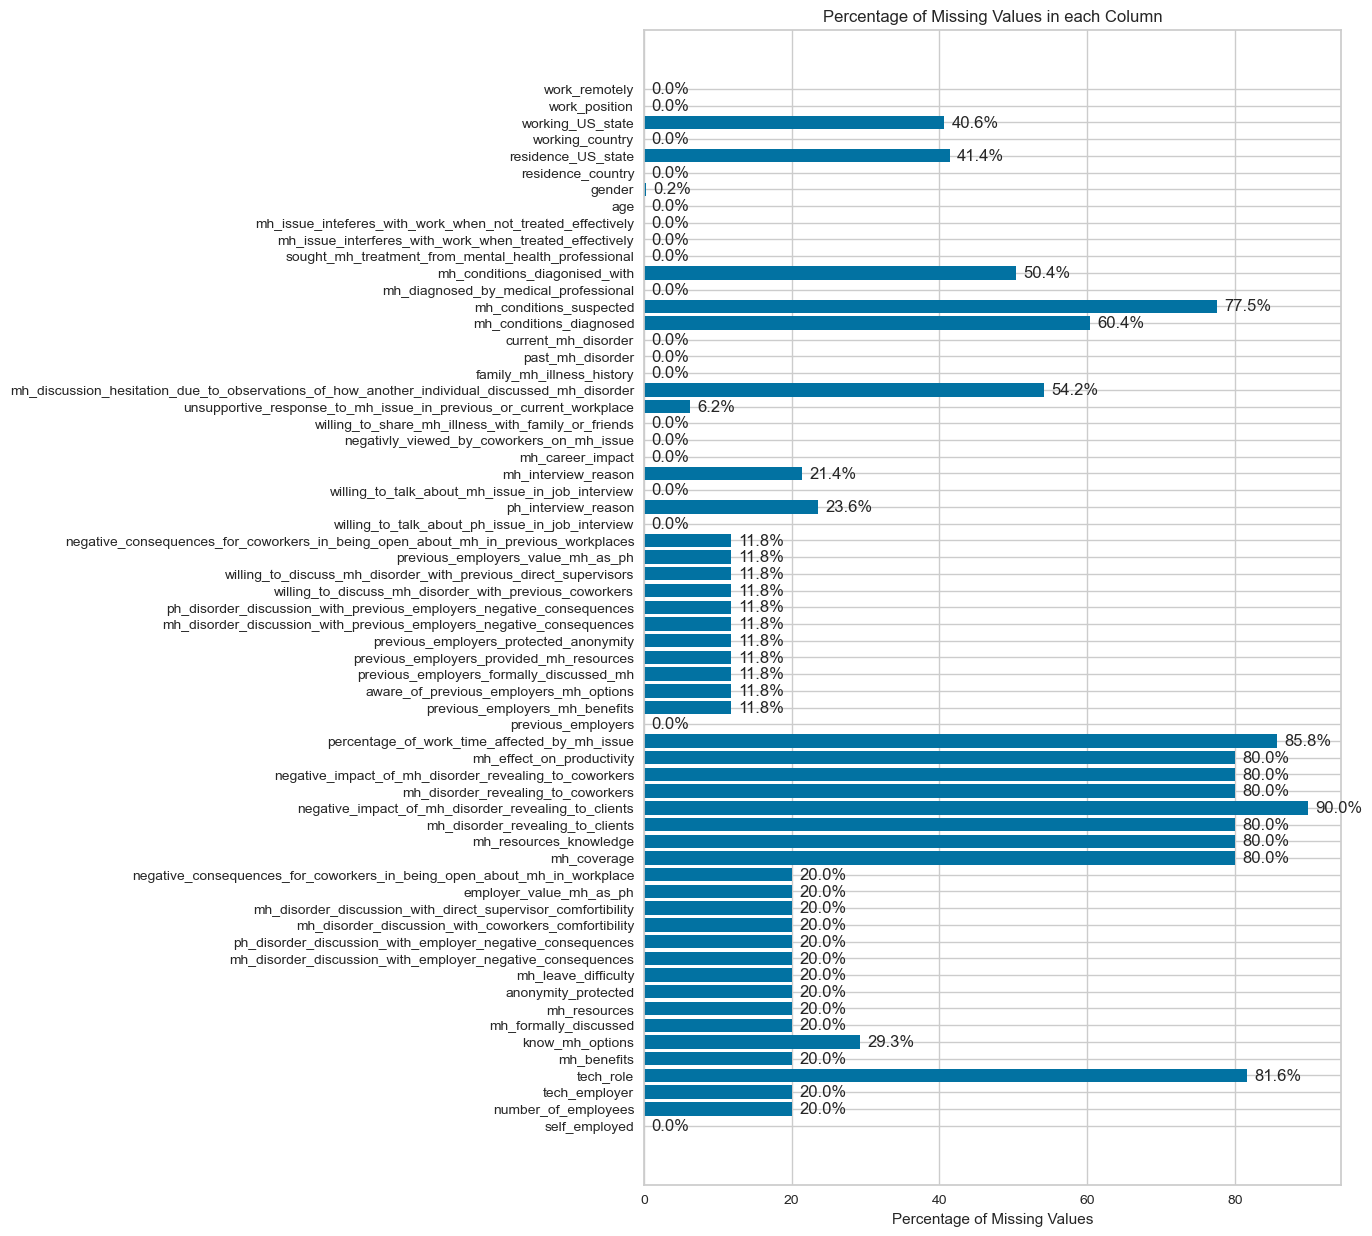

In [122]:
# Percentage of missing values in each column
fig, ax = plt.subplots(figsize=(9, 15))

# Calculate missing value percentages
missing_percentages = df.isnull().sum() / len(df) * 100

# Create the bar plot
graph = ax.barh(df.columns, missing_percentages)

# Annotate bars with percentages
for i, (v, text) in enumerate(zip(missing_percentages, df.columns)):
    ax.text(v + 1, i, f"{v:.1f}%", va='center')  # Adjust position and format
    
# Set labels and title
ax.set_title('Percentage of Missing Values in each Column')
ax.set_xlabel('Percentage of Missing Values')

plt.show()

In [123]:
# Identify and drop columns with a missing value percentage greater than or equal to 50 percent
missing_percentage = df.isnull().sum() / len(df) * 100
columns_to_drop = missing_percentage[missing_percentage >= 50].keys()
print(columns_to_drop)
df.drop(columns_to_drop, axis=1, inplace=True)


Index(['tech_role', 'mh_coverage', 'mh_resources_knowledge',
       'mh_disorder_revealing_to_clients',
       'negative_impact_of_mh_disorder_revealing_to_clients',
       'mh_disorder_revealing_to_coworkers',
       'negative_impact_of_mh_disorder_revealing_to_coworkers',
       'mh_effect_on_productivity',
       'percentage_of_work_time_affected_by_mh_issue',
       'mh_discussion_hesitation_due_to_observations_of_how_another_individual_discussed_mh_disorder',
       'mh_conditions_diagnosed', 'mh_conditions_suspected',
       'mh_conditions_diagonised_with'],
      dtype='object')


In [124]:
# Find duplicates
df.duplicated().sum()


0

In [125]:
# Check columns with high number of unique entries (over 10 unique entries)
for column in df.columns:
    if len(df[column].unique()) > 10:
        print(len(df[column].unique()),column)
        

1086 ph_interview_reason
1081 mh_interview_reason
53 age
71 gender
53 residence_country
48 residence_US_state
53 working_country
49 working_US_state
264 work_position


In [126]:
# Check the unique entries in columns with high number of unique entries
for column in df.columns:
    if len(df[column].unique())>10:
        print(column,df[column].unique())
        

ph_interview_reason [nan
 'It would depend on the health issue. If there is a health issue that would not immediately affect my job performance, such as diabetes, I would not bring it up during the interview. If it was something more severe, such as narcolepsy, I might bring it up depending on how controlled it was.'
 'They would provable need to know, to Judge if I can do my job or not. '
 ... ' QF'
 'Fear that doing so would cause the employer to factor in additional health insurance expense.'
 'Stigma with some diseases']
mh_interview_reason [nan
 'While mental health has become a more prominent issue recently, I feel like there is still a lot of stigma surrounding it. At this point, with our culture, I would not bring it up. I hope that within the next 20-30 years that stigma will be gone and it can be brought up safely in an interview.'
 'Stigma, mainly. ' ... 'E'
 'Fear that the employer would consider additional health insurance expense and would doubt my ability to execute my w

In [127]:
# Drop columns "ph_interview_reason" and "mh_interview_reason" 
# due to their gigantic number of entries that are personal and does not help in generalization
df = df.drop(columns=["ph_interview_reason", "mh_interview_reason"])


### Exploratory Data Analysis (EDA)

In [128]:
# Describe objects in dataset
df.describe(include='object').T


count unique  \
number_of_employees                                 1146      6   
mh_benefits                                         1146      4   
know_mh_options                                     1013      3   
mh_formally_discussed                               1146      3   
mh_resources                                        1146      3   
anonymity_protected                                 1146      3   
mh_leave_difficulty                                 1146      6   
mh_disorder_discussion_with_employer_negative_c...  1146      3   
ph_disorder_discussion_with_employer_negative_c...  1146      3   
mh_disorder_discussion_with_coworkers_comfortib...  1146      3   
mh_disorder_discussion_with_direct_supervisor_c...  1146      3   
employer_value_mh_as_ph                             1146      3   
negative_consequences_for_coworkers_in_being_op...  1146      2   
previous_employers_mh_benefits                      1264      4   
aware_of_previous_employers_mh_options              1264      4   
previous_employers_formally_discussed_mh            1264      4   
previous_employers_provided_mh_resources            1264      3   
previous_employers_protected_anonymity              1264      4   
mh_disorder_discussion_with_previous_employers_...  1264      4   
ph_disorder_discussion_with_previous_employers_...  1264      3   
willing_to_discuss_mh_disorder_with_previous_co...  1264      3   
willing_to_discuss_mh_disorder_with_previous_di...  1264      4   
previous_employers_value_mh_as_ph                   1264      4   
negative_consequences_for_coworkers_in_being_op...  1264      3   
willing_to_talk_about_ph_issue_in_job_interview     1433      3   
willing_to_talk_about_mh_issue_in_job_interview     1433      3   
mh_career_impact                                    1433      5   
negativly_viewed_by_coworkers_on_mh_issue           1433      5   
willing_to_share_mh_illness_with_family_or_friends  1433      6   
unsupportive_response_to_mh_issue_in_previous_o...  1344      4   
family_mh_illness_history                           1433      3   
past_mh_disorder                                    1433      3   
current_mh_disorder                                 1433      3   
mh_diagnosed_by_medical_professional                1433      2   
mh_issue_interferes_with_work_when_treated_effe...  1433      5   
mh_issue_inteferes_with_work_when_not_treated_e...  1433      5   
gender                                              1430     70   
residence_country                                   1433     53   
residence_US_state                                   840     47   
working_country                                     1433     53   
working_US_state                                     851     48   
work_position                                       1433    264   
work_remotely                                       1433      3   

                                                                              top  \
number_of_employees                                                        26-100   
mh_benefits                                                                   Yes   
know_mh_options                                                                No   
mh_formally_discussed                                                          No   
mh_resources                                                                   No   
anonymity_protected                                                  I don't know   
mh_leave_difficulty                                                 Somewhat easy   
mh_disorder_discussion_with_employer_negative_c...                          Maybe   
ph_disorder_discussion_with_employer_negative_c...                             No   
mh_disorder_discussion_with_coworkers_comfortib...                          Maybe   
mh_disorder_discussion_with_direct_supervisor_c...                            Yes   
employer_value_mh_as_ph                                              I don't know 

In [129]:
# Describe numerical objects in dataset
df.describe().T


count       mean  \
self_employed                                       1433.0   0.200279   
tech_employer                                       1146.0   0.770506   
previous_employers                                  1433.0   0.882066   
sought_mh_treatment_from_mental_health_professi...  1433.0   0.585485   
age                                                 1433.0  34.286113   

                                                          std  min   25%  \
self_employed                                        0.400349  0.0   0.0   
tech_employer                                        0.420691  0.0   1.0   
previous_employers                                   0.322643  0.0   1.0   
sought_mh_treatment_from_mental_health_professi...   0.492810  0.0   0.0   
age                                                 11.290931  3.0  28.0   

                                                     50%   75%    max  
self_employed                                        0.0   0.0    1.0  
tech_employer                                        1.0   1.0    1.0  
previous_employers                                   1.0   1.0    1.0  
sought_mh_treatment_from_mental_health_professi...   1.0   1.0    1.0  
age                                                 33.0  39.0  323.0

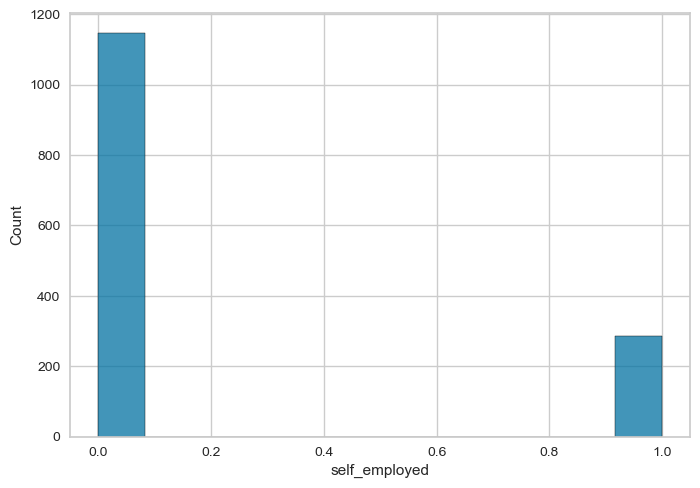

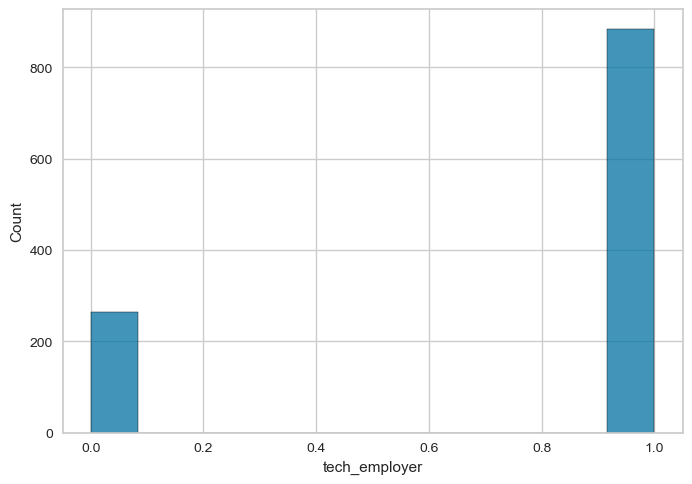

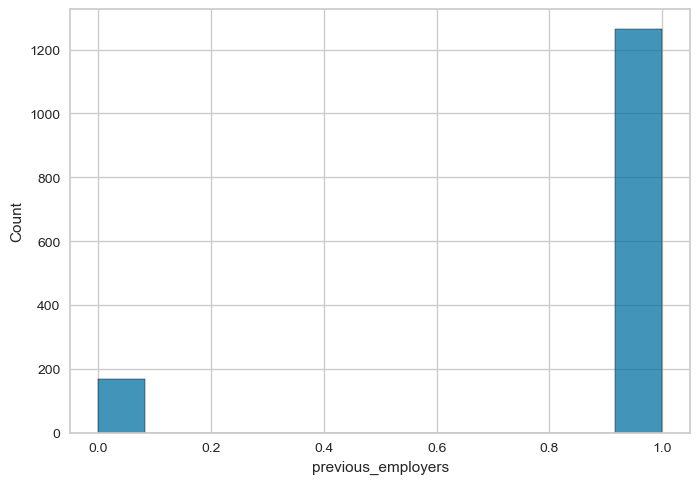

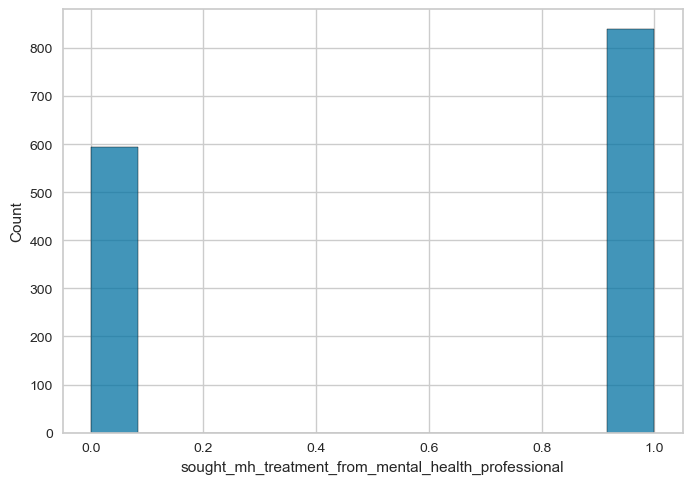

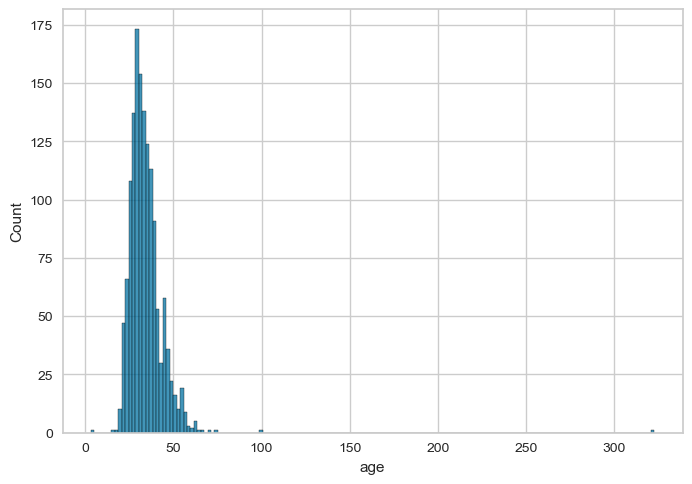

In [130]:
# Histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()
    

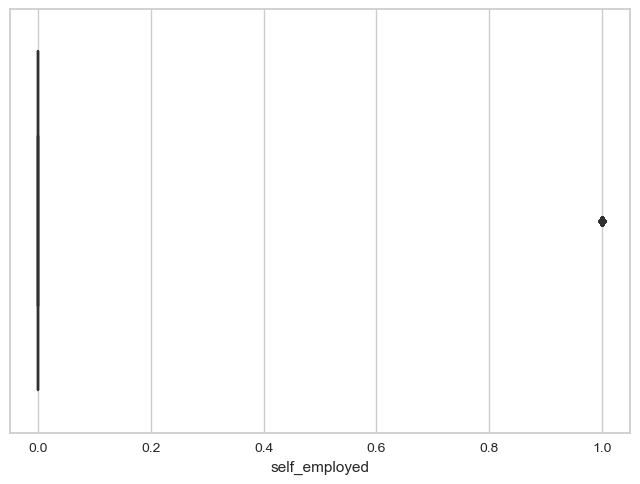

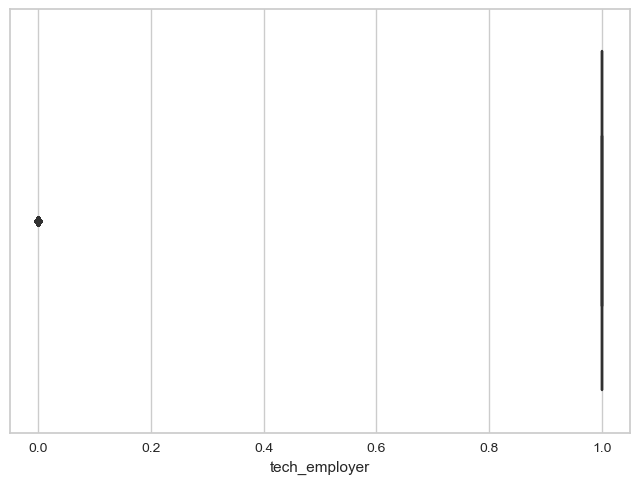

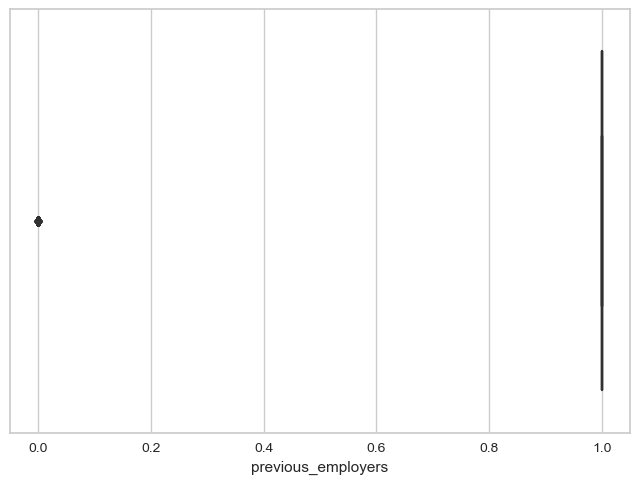

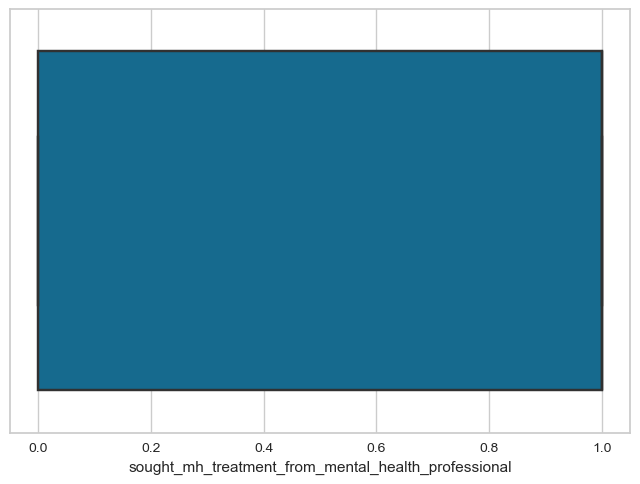

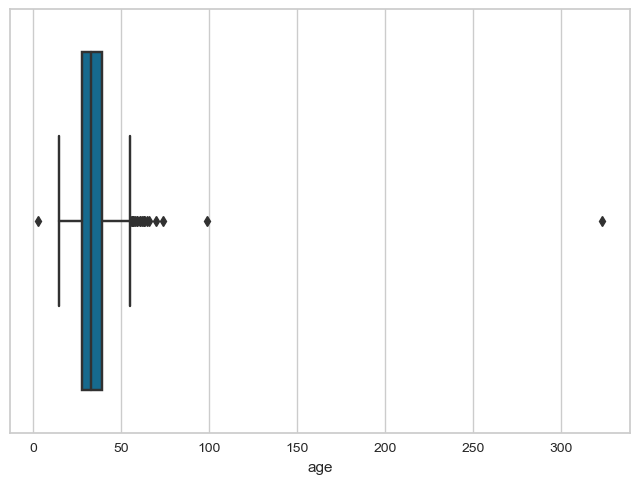

In [131]:
# Boxplot to identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()
    

<Axes: >

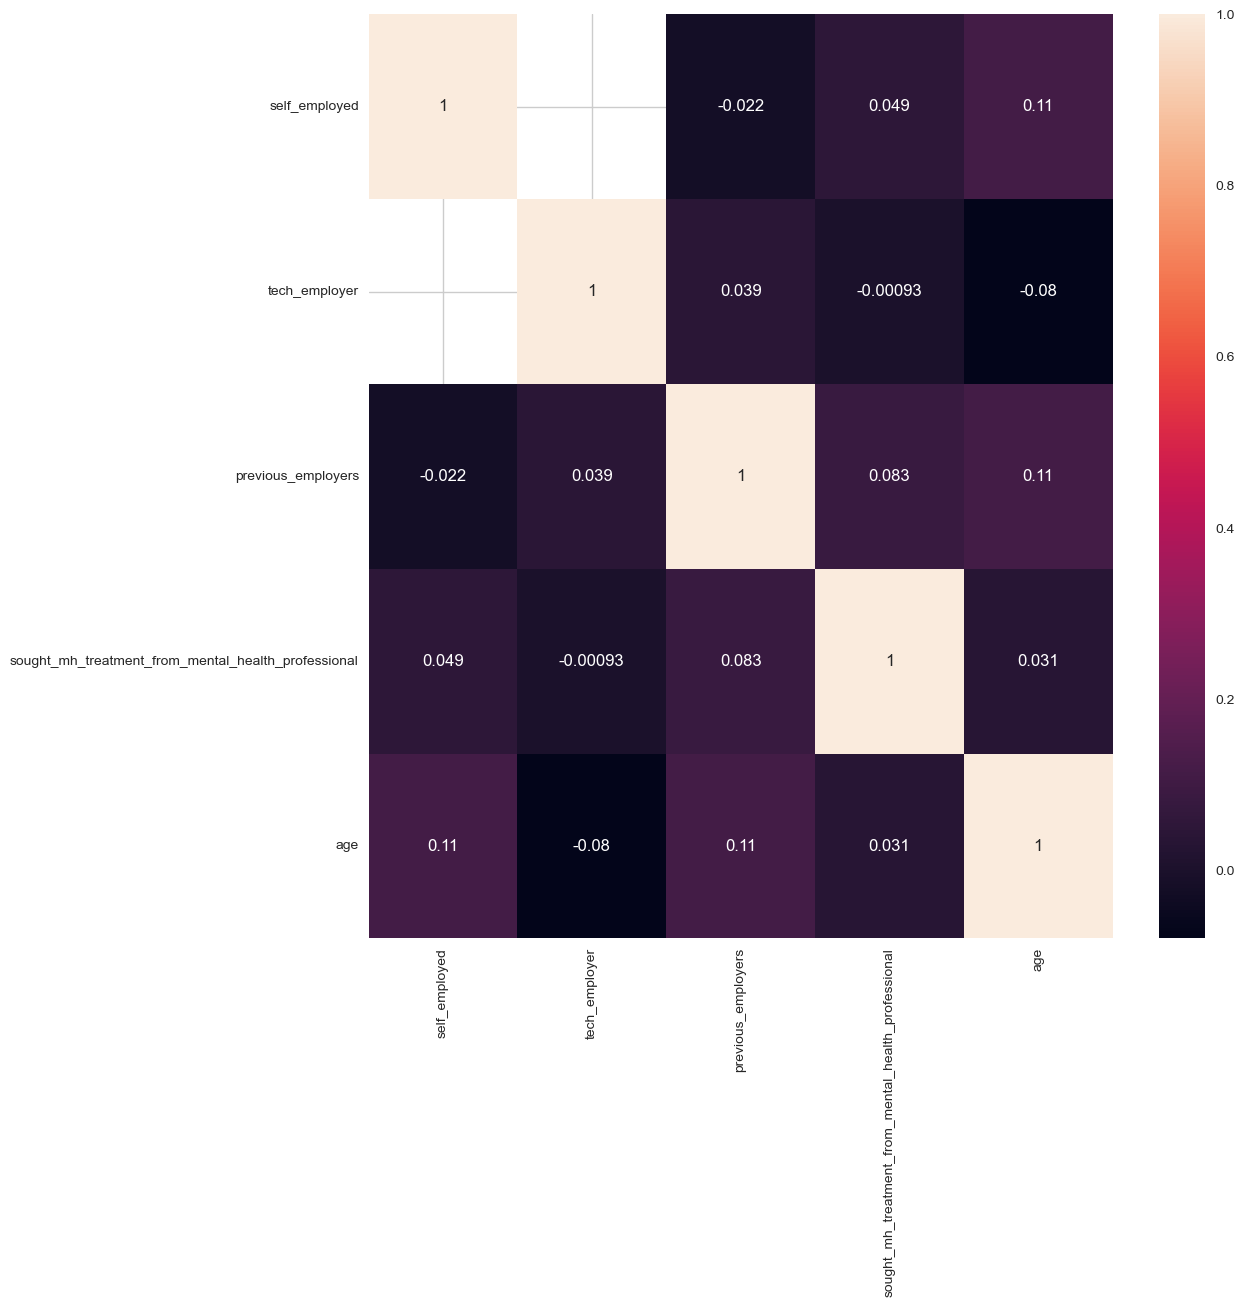

In [132]:
# Correlation with heatmap to identify multicolliniarity among columns with numeric values
plt.figure(figsize=(12,12))
s = df.select_dtypes(include="number").corr()
sns.heatmap(s, annot=True)


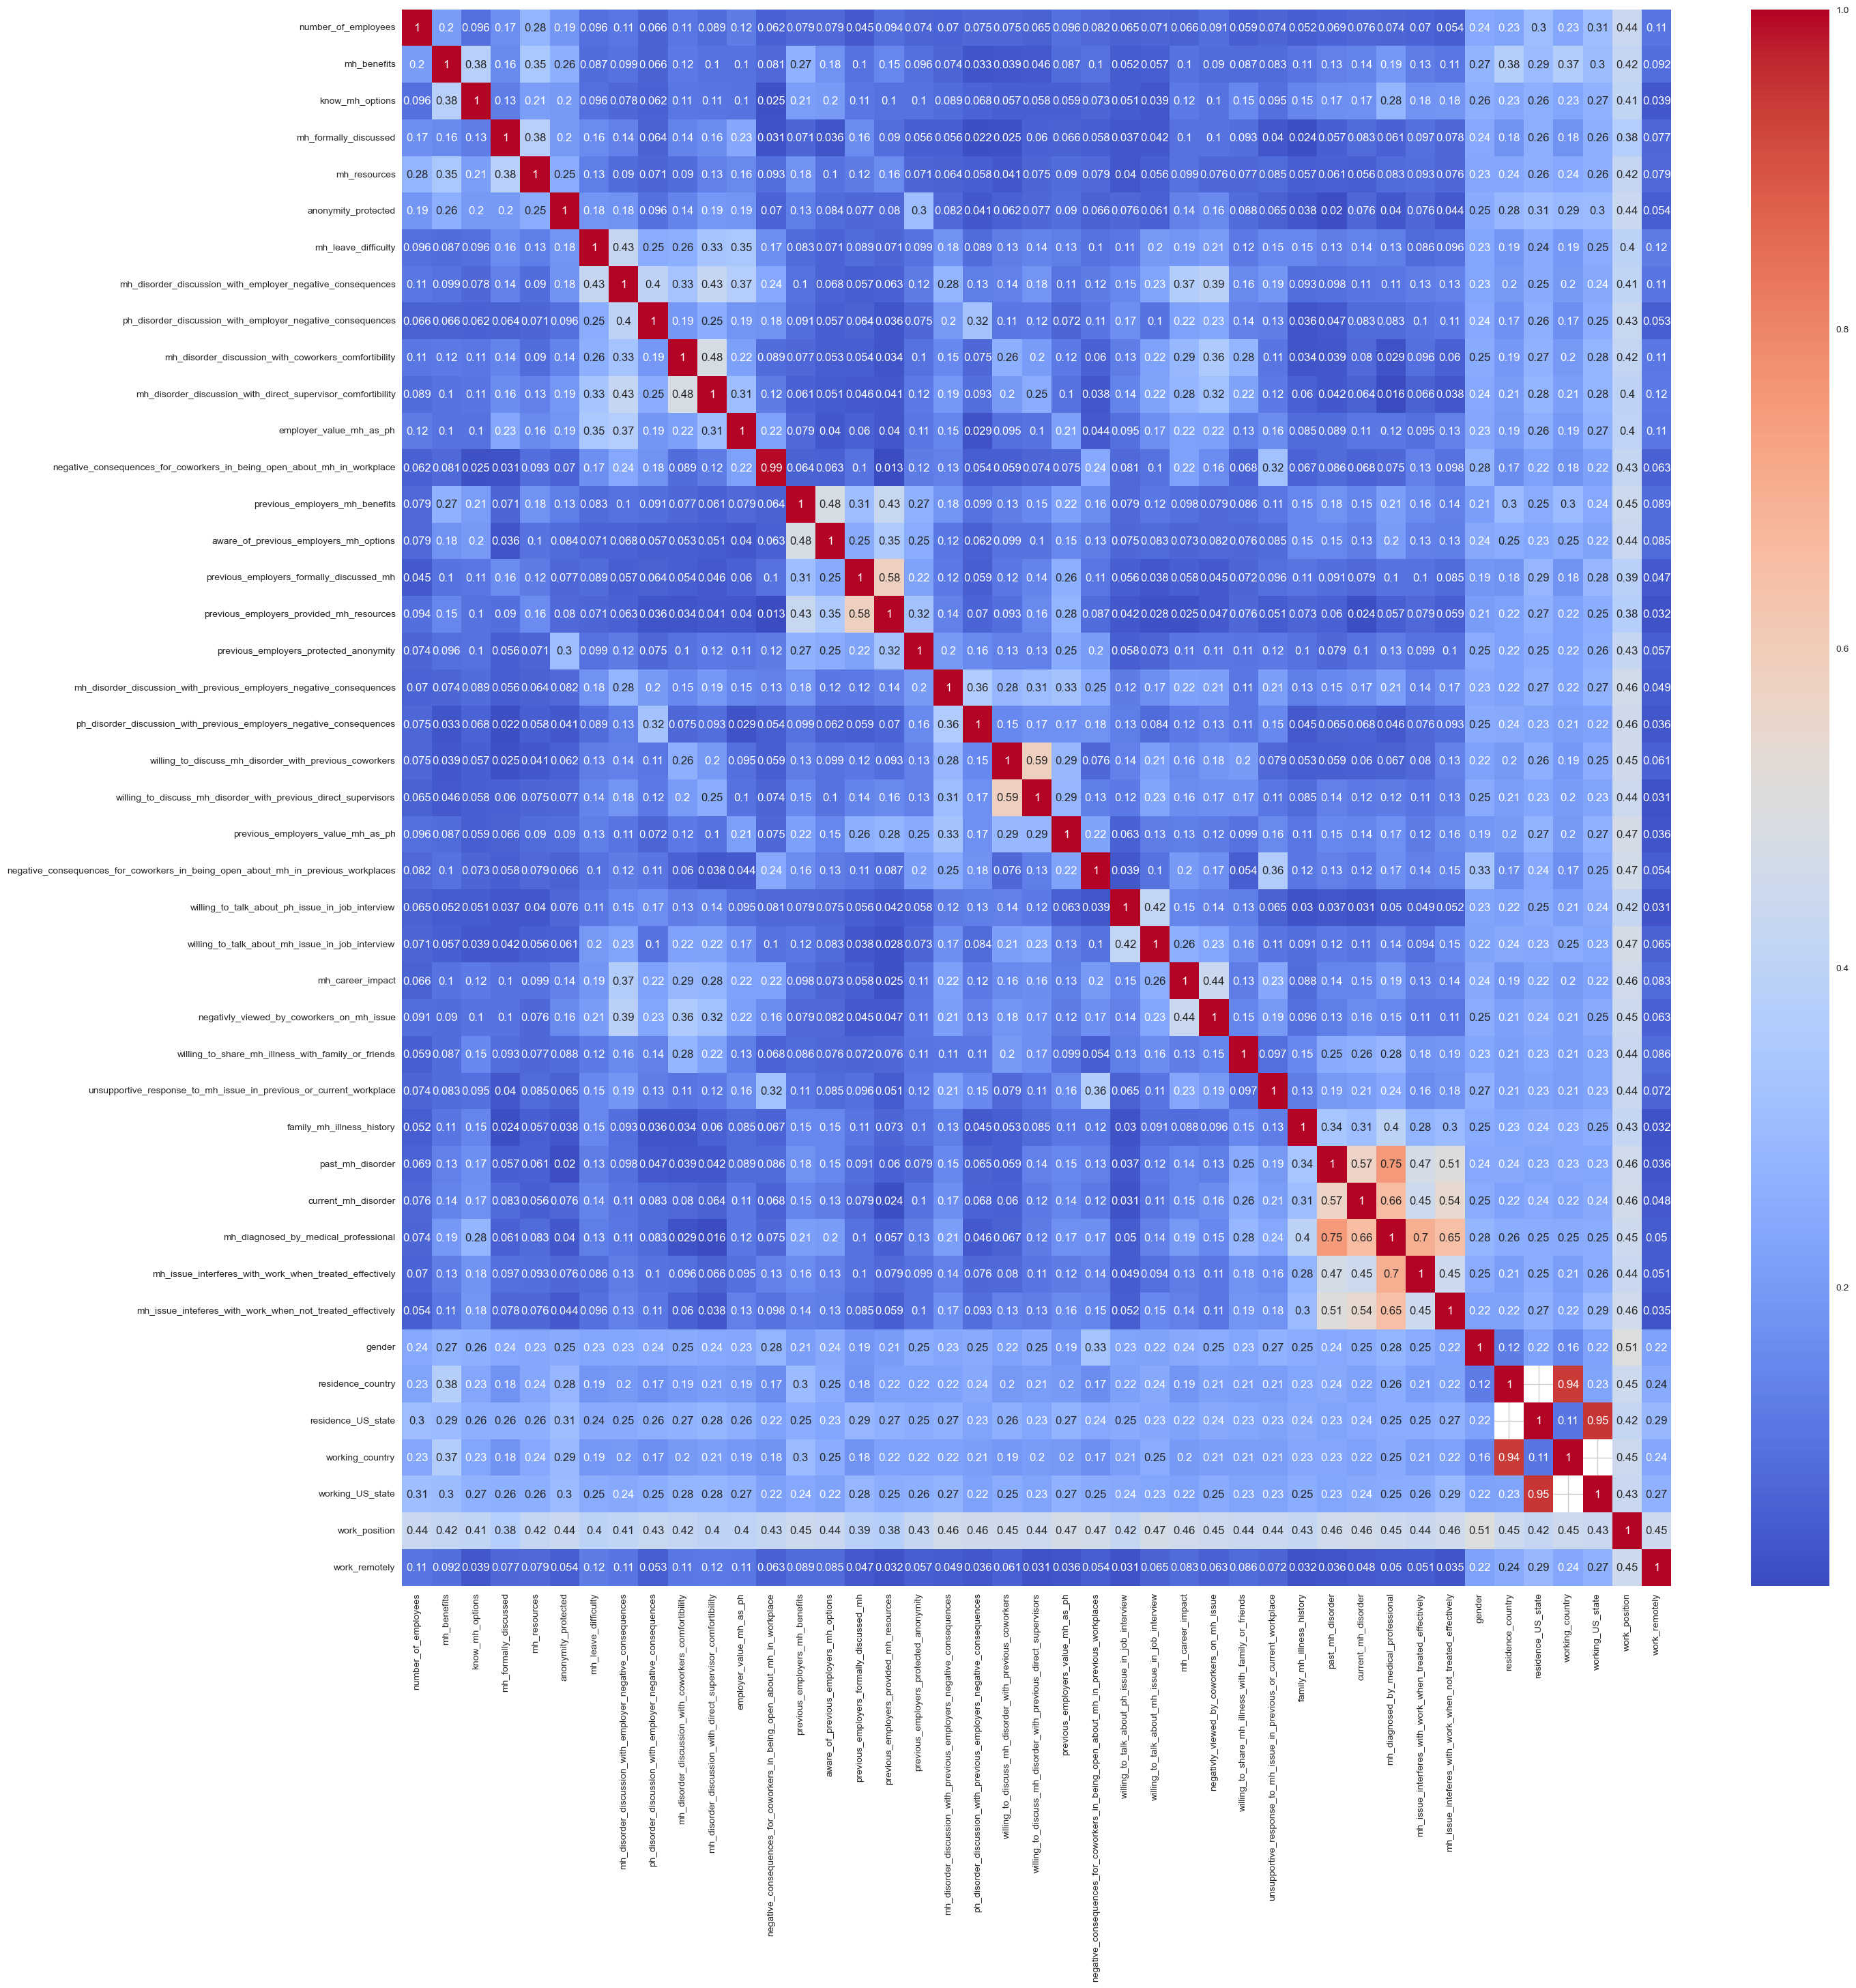

In [133]:
# Correlation with heatmap to identify multicolliniarity among columns with categorical values

# Set a large figure size for better visualization
plt.figure(figsize=(30, 30))

# Function to calculate Cramer's V for categorical variables
def cramers_v(x, y):
    """
    This function calculates Cramer's V, a measure of association
    between two categorical variables.

    Args:
        x (pandas.Series): The first categorical variable.
        y (pandas.Series): The second categorical variable.

    Returns:
        float: The Cramer's V coefficient between x and y.
    """

    # Create a contingency table to summarize the co-occurrence of categories
    confusion_matrix = pd.crosstab(x, y)

    # Perform chi-square test to assess the relationship between variables
    chi2, _, _, _ = chi2_contingency(confusion_matrix)

    # Calculate Phi-squared, a chi-square normalized by sample size
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n

    # Adjust for bias due to small sample sizes or small number of categories
    r, k = confusion_matrix.shape
    phi2corr = phi2 / min(k - 1, r - 1)

    # Return the square root of the adjusted Phi-squared, which is Cramer's V
    return np.sqrt(phi2corr)

# Get columns with categorical values
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a zero-filled correlation matrix to store Cramer's V coefficients
corr_matrix = np.zeros((len(categorical_cols), len(categorical_cols)))

# Calculate Cramer's V for all pairs of categorical columns (upper triangle only)
for i in range(len(categorical_cols)):
    for j in range(i, len(categorical_cols)):
        corr_matrix[i, j] = cramers_v(df[categorical_cols[i]], df[categorical_cols[j]])

# Define a function to get the lower triangle indices efficiently
def get_tril_indices(n):
    """
    This function efficiently retrieves the indices for the lower triangle of an n x n matrix.

    Args:
        n (int): The size of the square matrix.

    Returns:
        tuple: A tuple of arrays representing the row and column indices for the lower triangle.
    """
    rows, cols = np.tril_indices(n, k=0)  # Directly use tril_indices
    return rows, cols

# Get the lower triangle indices
rows, cols = get_tril_indices(corr_matrix.shape[0])

# Fill the symmetric lower triangle of the correlation matrix
corr_matrix[rows, cols] = corr_matrix.T[rows, cols]

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=categorical_cols, yticklabels=categorical_cols)

plt.show()

In [134]:
# Drop one of each two highly correlated columns
cols_to_drop = ["residence_US_state", "residence_country"]
df.drop(cols_to_drop, axis=1, inplace=True)


### Handle Error and Missing Values

In [135]:
# Number of missing values in each column
df.isnull().sum()


self_employed                                                                          0
number_of_employees                                                                  287
tech_employer                                                                        287
mh_benefits                                                                          287
know_mh_options                                                                      420
mh_formally_discussed                                                                287
mh_resources                                                                         287
anonymity_protected                                                                  287
mh_leave_difficulty                                                                  287
mh_disorder_discussion_with_employer_negative_consequences                           287
ph_disorder_discussion_with_employer_negative_consequences                           287
mh_disorder_discussio

In [136]:
# Examine self_employed column values
print(df['self_employed'].unique())


[0 1]


In [137]:
# Examine number_of_employees column values
print(df['number_of_employees'].unique())


['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']


In [138]:
# Correct the entries misinterpreted as date in number_of_employees column
df.loc[:, 'number_of_employees'] = df['number_of_employees'].replace({'01-05': '1-5', '01-06': '6-25'})

# Define ranges
number_of_employees_ranges = {
    '1-5': '1-5',
    '6-25': '6-25',
    '26 - 100': '26-100',
    '100-500': '101-500',
    '500-1000': '501-1000',
    'More than 1000': '1000+'
}

# Apply the ranges to the column
df.loc[:, 'number_of_employees'] = df['number_of_employees'].replace(number_of_employees_ranges)

# Check the transformation
print(df['number_of_employees'].value_counts())


number_of_employees
26-100      292
1000+       256
101-500     248
6-25        210
501-1000     80
1-5          60
Name: count, dtype: int64


In [139]:
# Examine tech_employer column values
print(df['tech_employer'].unique())


[ 1. nan  0.]


In [140]:
# Examine mh_benefits column values
print(df['mh_benefits'].unique())


['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]


In [141]:
# Organize the mh_benefits column categories

No = ["No", "Not eligible for coverage / N/A"]
Yes = ["Yes"]
Unknown = ["I don't know"]

df["mh_benefits"] = df["mh_benefits"].replace(No, "No")
df["mh_benefits"] = df["mh_benefits"].replace(Yes, 'Yes')
df["mh_benefits"] = df["mh_benefits"].replace(Unknown, "Unknown")
df.value_counts("mh_benefits")


mh_benefits
Yes        531
Unknown    319
No         296
Name: count, dtype: int64

In [142]:
# Examine know_mh_options column values
print(df['know_mh_options'].unique())


[nan 'Yes' 'I am not sure' 'No']


In [143]:
# Examine mh_formally_discussed column values
print(df['mh_formally_discussed'].unique())


['No' 'Yes' nan "I don't know"]


In [144]:
# Examine mh_resources column values
print(df['mh_resources'].unique())


['No' 'Yes' nan "I don't know"]


In [145]:
# Examine anonymity_protected column values
print(df['anonymity_protected'].unique())


["I don't know" 'Yes' nan 'No']


In [146]:
# Examine mh_leave_difficulty column values
print(df['mh_leave_difficulty'].unique())


['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know"]


In [147]:
# Organize the mh_leave_difficulty column categories

Easy = ["Somewhat easy", "Very easy", ]
Difficult = ["Somewhat difficult","Very difficult"]
Medium = ["Neither easy nor difficult"]
Unknown = ["I don't know"]

df["mh_leave_difficulty"] = df["mh_leave_difficulty"].replace(Easy, "Easy")
df["mh_leave_difficulty"] = df["mh_leave_difficulty"].replace(Difficult, 'Difficult')
df["mh_leave_difficulty"] = df["mh_leave_difficulty"].replace(Medium, "Medium")
df["mh_leave_difficulty"] = df["mh_leave_difficulty"].replace(Unknown, "Unknown")
df.value_counts("mh_leave_difficulty")


mh_leave_difficulty
Easy         501
Difficult    317
Medium       178
Unknown      150
Name: count, dtype: int64

In [148]:
# Examine mh_disorder_discussion_with_employer_negative_consequences column values
print(df['mh_disorder_discussion_with_employer_negative_consequences'].unique())


['No' 'Maybe' nan 'Yes']


In [149]:
# Examine ph_disorder_discussion_with_employer_negative_consequences column values
print(df['ph_disorder_discussion_with_employer_negative_consequences'].unique())


['No' nan 'Maybe' 'Yes']


In [150]:
# Examine mh_disorder_discussion_with_coworkers_comfortibility column values
print(df['mh_disorder_discussion_with_coworkers_comfortibility'].unique())


['Maybe' nan 'Yes' 'No']


In [151]:
# Examine mh_disorder_discussion_with_direct_supervisor_comfortibility column values
print(df['mh_disorder_discussion_with_direct_supervisor_comfortibility'].unique())

['Yes' 'Maybe' nan 'No']


In [152]:
# Examine employer_value_mh_as_ph values
print(df['employer_value_mh_as_ph'].unique())

["I don't know" 'Yes' nan 'No']


In [153]:
# Examine negative_consequences_for_coworkers_in_being_open_about_mh_in_workplace column values
print(df['negative_consequences_for_coworkers_in_being_open_about_mh_in_workplace'].unique())

['No' nan 'Yes']


In [154]:
# Examine previous_employerss column values
print(df['previous_employers'].unique())


[1 0]


In [155]:
# Examine previous_employers_mh_benefits column values
print(df['previous_employers_mh_benefits'].unique())


['No, none did' 'Yes, they all did' 'Some did' "I don't know" nan]


In [156]:
# Examine aware_of_previous_employers_mh_options column values
print(df['aware_of_previous_employers_mh_options'].unique())


['N/A (not currently aware)' 'I was aware of some'
 'Yes, I was aware of all of them' 'No, I only became aware later' nan]


In [157]:
# Examine previous_employers_formally_discussed_mh column values
print(df['previous_employers_formally_discussed_mh'].unique())


["I don't know" 'None did' 'Some did' nan 'Yes, they all did']


In [158]:
# Examine previous_employers_provided_mh_resources column values
print(df['previous_employers_provided_mh_resources'].unique())


['None did' 'Some did' nan 'Yes, they all did']


In [159]:
# Examine previous_employers_protected_anonymity column values
print(df['previous_employers_protected_anonymity'].unique())


["I don't know" 'Yes, always' 'Sometimes' 'No' nan]


In [160]:
# Examine mh_disorder_discussion_with_previous_employers_negative_consequences column values
print(df['mh_disorder_discussion_with_previous_employers_negative_consequences'].unique())


['Some of them' 'None of them' "I don't know" 'Yes, all of them' nan]


In [161]:
# Examine ph_disorder_discussion_with_previous_employers_negative_consequences column values
print(df['ph_disorder_discussion_with_previous_employers_negative_consequences'].unique())


['None of them' 'Some of them' 'Yes, all of them' nan]


In [162]:
# Examine willing_to_discuss_mh_disorder_with_previous_coworkers column values
print(df['willing_to_discuss_mh_disorder_with_previous_coworkers'].unique())


['Some of my previous employers' 'No, at none of my previous employers'
 'Yes, at all of my previous employers' nan]


In [163]:
# Examine willing_to_discuss_mh_disorder_with_previous_direct_supervisors column values
print(df['willing_to_discuss_mh_disorder_with_previous_direct_supervisors'].unique())


['Some of my previous employers' "I don't know"
 'No, at none of my previous employers'
 'Yes, at all of my previous employers' nan]


In [164]:
# Examine previous_employers_value_mh_as_ph column values
print(df['previous_employers_value_mh_as_ph'].unique())


["I don't know" 'Some did' 'None did' 'Yes, they all did' nan]


In [165]:
# Examine negative_consequences_for_coworkers_in_being_open_about_mh_in_previous_workplaces column values
print(df['negative_consequences_for_coworkers_in_being_open_about_mh_in_previous_workplaces'].unique())


['None of them' 'Some of them' nan 'Yes, all of them']


In [166]:
# Examine willing_to_talk_about_ph_issue_in_job_interview column values
print(df['willing_to_talk_about_ph_issue_in_job_interview'].unique())


['Maybe' 'Yes' 'No']


In [167]:
# Examine willing_to_talk_about_mh_issue_in_job_interview  column values
print(df['willing_to_talk_about_mh_issue_in_job_interview'].unique())


['Maybe' 'No' 'Yes']


In [168]:
# Examine mh_career_impact column values
print(df['mh_career_impact'].unique())


['Maybe' "No, I don't think it would" 'Yes, I think it would'
 'No, it has not' 'Yes, it has']


In [169]:
# Examine negativly_viewed_by_coworkers_on_mh_issue column values
print(df['negativly_viewed_by_coworkers_on_mh_issue'].unique())


["No, I don't think they would" 'Maybe' 'Yes, they do'
 'Yes, I think they would' 'No, they do not']


In [170]:
# Examine willing_to_share_mh_illness_with_family_or_friends column values
print(df['willing_to_share_mh_illness_with_family_or_friends'].unique())


['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open']


In [171]:
# Organize the willing_to_share_mh_illness_with_family_or_friends column categories

Open = ["Somewhat open", "Very open", ]
Not_open = ["Somewhat not open","Not open at all"]

df["willing_to_share_mh_illness_with_family_or_friends"] = df["willing_to_share_mh_illness_with_family_or_friends"].replace(Open, "Open")
df["willing_to_share_mh_illness_with_family_or_friends"] = df["willing_to_share_mh_illness_with_family_or_friends"].replace(Not_open, "Not open")

df.value_counts("willing_to_share_mh_illness_with_family_or_friends")


willing_to_share_mh_illness_with_family_or_friends
Open                                                     891
Not open                                                 289
Neutral                                                  141
Not applicable to me (I do not have a mental illness)    112
Name: count, dtype: int64

In [172]:
# Examine unsupportive_response_to_mh_issue_in_previous_or_current_workplace column values
print(df['unsupportive_response_to_mh_issue_in_previous_or_current_workplace'].unique())


['No' 'Maybe/Not sure' 'Yes, I experienced' 'Yes, I observed' nan]


In [173]:
# Examine family_mh_illness_history column values
print(df['family_mh_illness_history'].unique())


['No' 'Yes' "I don't know"]


In [174]:
# Examine past_mh_disorder column values
print(df['past_mh_disorder'].unique())


['Yes' 'Maybe' 'No']


In [175]:
# Examine current_mh_disorder column values
print(df['current_mh_disorder'].unique())


['No' 'Yes' 'Maybe']


In [176]:
# Examine mh_diagnosed_by_medical_professional column values
print(df['mh_diagnosed_by_medical_professional'].unique())


['Yes' 'No']


In [177]:
# Examine sought_mh_treatment_from_mental_health_professional column values
print(df['sought_mh_treatment_from_mental_health_professional'].unique())


[0 1]


In [178]:
# Examine mh_issue_interferes_with_work_when_treated_effectively column values
print(df['mh_issue_interferes_with_work_when_treated_effectively'].unique())


['Not applicable to me' 'Rarely' 'Sometimes' 'Never' 'Often']


In [179]:
# Examine mh_issue_inteferes_with_work_when_not_treated_effectively values
print(df['mh_issue_inteferes_with_work_when_not_treated_effectively'].unique())


['Not applicable to me' 'Sometimes' 'Often' 'Rarely' 'Never']


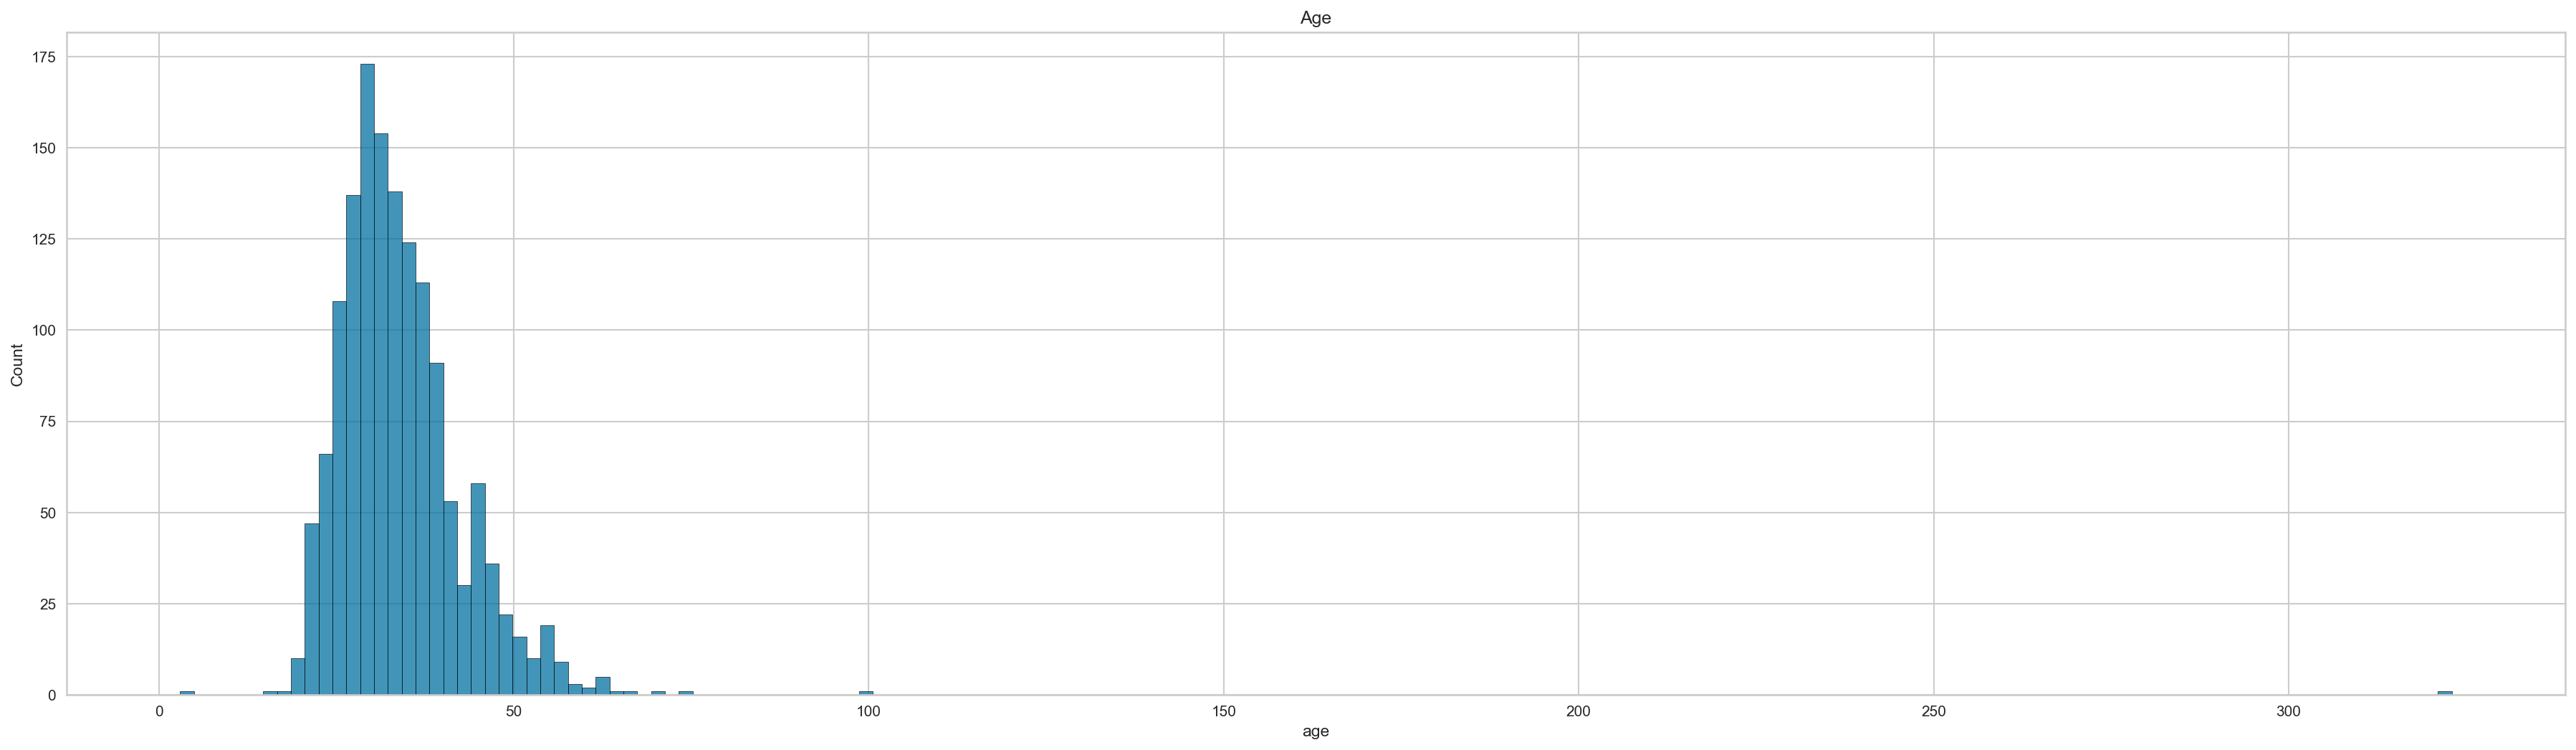

In [180]:
# Examine age column values
plt.figure(figsize=(30, 8),dpi=150)
sns.histplot(data=df,x="age")
plt.title("Age")
plt.show()


In [181]:
# Calculate the mean age value
mean_age =df["age"].mean()
print(mean_age)
df['age'].fillna(mean_age, inplace=True)


34.28611304954641


In [182]:
# Change incorrect age values of greater than 75 and less than 18 to mean value 
mean = round(mean_age)
for i in df["age"]:
    if i >= 75  or i <= 18:
        df['age'] = df['age'].replace([i], mean)
        

In [183]:
# Change incorrect age values of greater than 75 and less than 18 to mean value 
mean = round(mean_age)
for i in df["age"]:
    if i >= 75  or i <= 18:
        df['age'] = df['age'].replace([i], mean) 
        

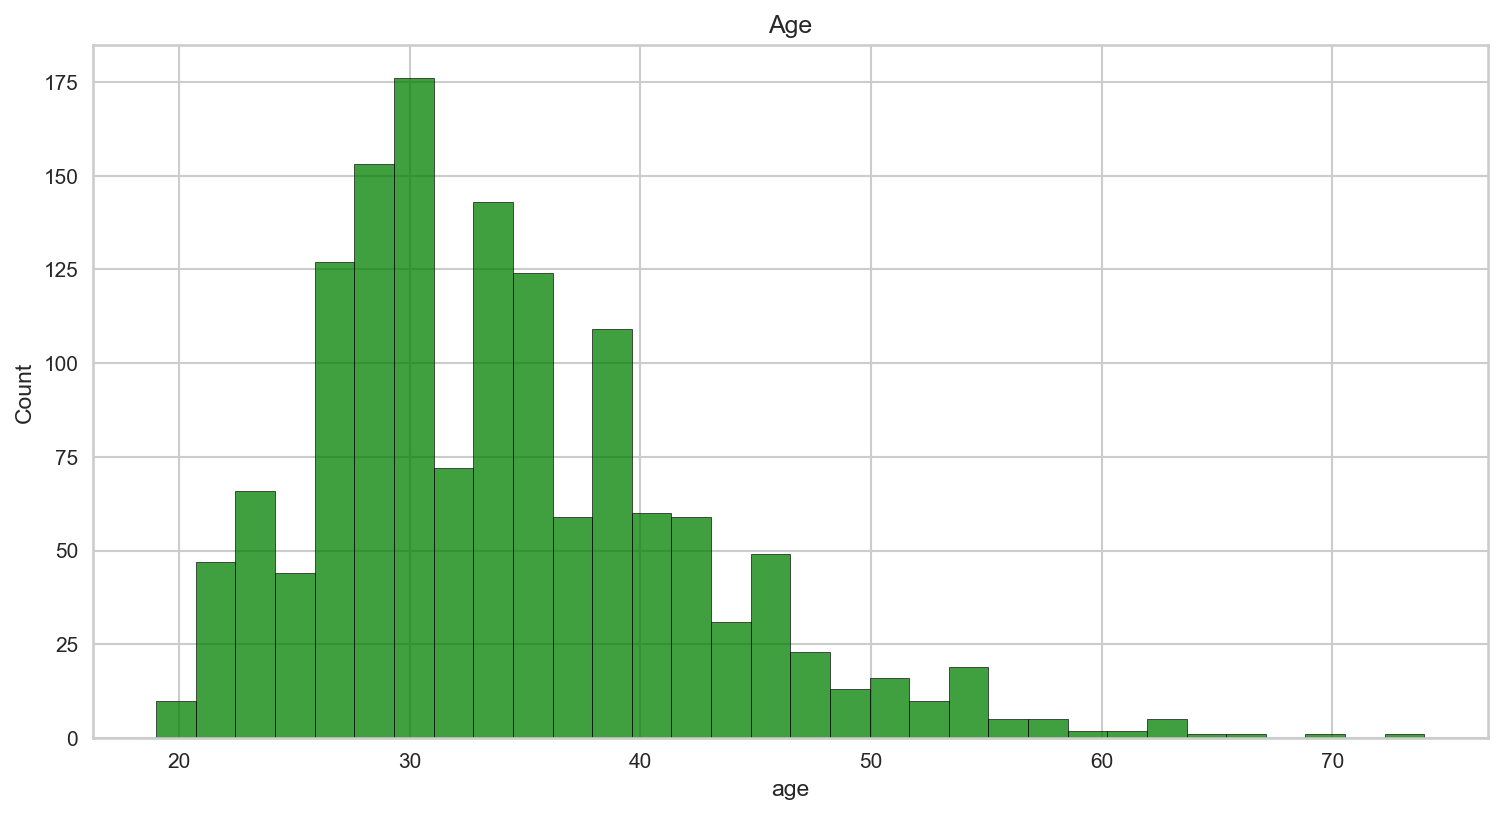

In [184]:
# Visualize age column values after changes
plt.figure(figsize=(12,6),dpi=150)
sns.histplot(data=df,x="age",color="green")
plt.title("Age")
plt.show()


In [185]:
for i in df["age"]:
    if i >= 18 and i < 25:
        df["age"] = df["age"].replace([i],"18-24")
    elif i >= 25 and i < 35:
        df["age"] = df["age"].replace([i],"25-34")
    elif i >= 35 and i < 45:
        df["age"] = df["age"].replace([i],"35-44")
    elif i >= 45 and i < 55:
        df["age"] = df["age"].replace([i],"45-54")
    elif i >= 55 and i < 65:
        df["age"] = df["age"].replace([i],"55-64")
    elif i >= 65:
        df["age"] = df["age"].replace([i],"65+") 
        
df.value_counts("age")


age
25-34    715
35-44    442
18-24    123
45-54    118
55-64     31
65+        4
Name: count, dtype: int64

In [186]:
# Examine gender column values
print(df['gender'].unique())


['Male' 'male' 'Male ' 'Female' 'M' 'female' 'm' 'I identify as female.'
 'female ' 'Bigender' 'non-binary' 'Female assigned at birth ' 'F' 'Woman'
 'man' 'fm' 'f' 'Cis female ' 'Transitioned, M2F'
 'Genderfluid (born female)' 'Other/Transfeminine'
 'Female or Multi-Gender Femme' 'Female ' 'woman' 'female/woman'
 'Cis male' 'Male.' 'Androgynous' 'male 9:1 female, roughly' nan
 'Male (cis)' 'Other' 'nb masculine' 'Cisgender Female' 'Man'
 'Sex is male' 'none of your business' 'genderqueer' 'cis male' 'Human'
 'Genderfluid' 'Enby' 'Malr' 'genderqueer woman' 'mtf' 'Queer' 'Agender'
 'Dude' 'Fluid'
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "
 'mail' 'M|' 'Male/genderqueer' 'fem' 'Nonbinary' 'male ' 'human'
 'Female (props for making this a freeform field, though)' ' Female'
 'Unicorn' 'Cis Male' 'Male (trans, FtM)' 'Cis-woman' 'Genderqueer'
 'cisdude' 'Genderflux demi-girl'


In [187]:
# Organize the gender column categories

Male = ['Male','M','Male ','male','m','man','Cis male','Male.','Male (cis)','Man','Sex is male',
                     'cis male','Malr','Dude',"I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
                     'mail','M|','male ','Cis Male','cis man','cisdude','MALE']

Female = ['Female','female','I identify as female.','female ','Female assigned at birth ','F','Woman','fm','f',
                        'Cis female ','Genderfluid (born female)','Female or Multi-Gender Femme','Female ','woman','female/woman',
                        'Cisgender Female','fem','Female (props for making this a freeform field, though)',' Female','Cis-woman']

df["gender"] = df["gender"].replace(Male, "Male")
df["gender"] = df["gender"].replace(Female, "Female")

other = list(df["gender"].value_counts().index)[2:]
df["gender"] = df["gender"].replace(other, "other")

df.value_counts("gender")


gender
Male      1057
Female     340
other       33
Name: count, dtype: int64

In [188]:
# Examine working_country column values
print(df['working_country'].value_counts())


working_country
United States of America    851
United Kingdom              183
Canada                       74
Germany                      58
Netherlands                  47
Australia                    34
Sweden                       20
Ireland                      15
France                       14
Switzerland                  10
Brazil                       10
India                         9
Russia                        9
New Zealand                   9
Denmark                       7
Bulgaria                      7
Finland                       7
Belgium                       5
South Africa                  4
Poland                        4
Austria                       4
Czech Republic                3
Italy                         3
Chile                         3
Norway                        3
Romania                       3
Spain                         3
Other                         2
Bosnia and Herzegovina        2
Afghanistan                   2
Pakistan                

In [189]:
# Organize the working_country column based on the United Nations geoscheme

Northern_America = ["Bermuda", "Canada", "Greenland", "Saint Pierre and Miquelon", "United States of America"]

Western_Europe = ["Austria", "Belgium", "France", "Germany", "Liechtenstein", " Luxembourg", "Monaco", "Netherlands", "Switzerland"]
Eastern_Europe = ["Belarus", "Bulgaria", "Czech Republic", "Hungary", "Poland", "Republic of Moldova", "Romania", "Russia", "Slovakia", "Ukraine"]
Southern_Europe = ["Albania", "Andorra", "Bosnia and Herzegovina", "Croatia", "Gibraltar", "Greece", "Holy See", "Italy", "Malta", "Montenegro", "North Macdonia", "Portugal", "San Marino", "Serbia", "Slovenia", "Spain"]
Northern_Europe = ["Aland Islands", "Denmark", "Estonia", "Faroe Islands", "Finland", "Iceland", "Ireland", "Isle of Man", "Latvia", "Lithuania", "Norway", "Sweden", "United Kingdom"]

Oceania = ["Australia", "New Zealand"]

Other = ["India", "South Africa", "other", "Afghanistan", "Pakistan", "Israel", "United Arab Emirates", "China", "Japan", "Vietnam", "Iran", "Brunei", "Bangladesh", "Turkey", "Belize", "Costa Rica", "El Salvador", "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama", "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Falkland Islands", "French Guiana", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]

df["working_country"] = df["working_country"].replace(Northern_America, "Northern America")
df["working_country"] = df["working_country"].replace(Western_Europe, "Western Europe")
df["working_country"] = df["working_country"].replace(Eastern_Europe, "Eastern Europe")
df["working_country"] = df["working_country"].replace(Southern_Europe, "Southern Europe")
df["working_country"] = df["working_country"].replace(Northern_Europe, "Northern Europe")
df["working_country"] = df["working_country"].replace(Oceania, "Oceania")
df["working_country"] = df["working_country"].replace(Other, "Other")

df.value_counts("working_country")


working_country
Northern America    925
Northern Europe     238
Western Europe      138
Other                51
Oceania              43
Eastern Europe       28
Southern Europe      10
Name: count, dtype: int64

In [190]:
# Examine working_US_state column values
print(df['working_US_state'].unique())


[nan 'Illinois' 'Tennessee' 'Virginia' 'California' 'Kentucky' 'Oregon'
 'Pennsylvania' 'New Jersey' 'Georgia' 'Washington' 'New York' 'Indiana'
 'Minnesota' 'Ohio' 'Florida' 'Massachusetts' 'North Dakota' 'Texas'
 'District of Columbia' 'Michigan' 'Vermont' 'North Carolina' 'Missouri'
 'Kansas' 'Nevada' 'Utah' 'Connecticut' 'Maryland' 'Colorado' 'Iowa'
 'South Dakota' 'Hawaii' 'Nebraska' 'Maine' 'Arizona' 'Oklahoma'
 'Wisconsin' 'Rhode Island' 'Alabama' 'West Virginia' 'Louisiana'
 'South Carolina' 'New Hampshire' 'New Mexico' 'Montana' 'Idaho' 'Alaska'
 'Delaware']


In [191]:
# Drop the column due to its high number of unique values
df.drop("working_US_state", axis=1, inplace=True)


In [192]:
# Examine work_position column values
df['work_position'].unique()


array(['Back-end Developer', 'Back-end Developer|Front-end Developer',
       'Supervisor/Team Lead',
       'Executive Leadership|Supervisor/Team Lead|Dev Evangelist/Advocate|DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer',
       'DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer|Designer',
       'Dev Evangelist/Advocate|Back-end Developer',
       'Support|Back-end Developer|One-person shop',
       'One-person shop|Front-end Developer|Back-end Developer',
       'Front-end Developer', 'Executive Leadership',
       'Supervisor/Team Lead|Dev Evangelist/Advocate|Back-end Developer|Front-end Developer',
       'DevOps/SysAdmin|Back-end Developer|Front-end Developer',
       'Designer', 'Other|Executive Leadership', 'One-person shop',
       'Other', 'Supervisor/Team Lead|Support|Back-end Developer',
       'Supervisor/Team Lead|DevOps/SysAdmin|Back-end Developer',
       'Other|Supervisor/Team Lead|Support|Back-end Developer|Designer',
       'Supervisor/

In [193]:
# Organize the work_position column categories

job_roles = df["work_position"].unique()

category = {
    "Developer": ["Back", "Developer", "Front"],
    "Management": ["Supervisor", "Team", "Lead", "Leadership", "Executive"],
    "DevOps": ["DevOps", "SysAdmin"],
    "Advocacy": ["Evangelist", "Advocate"],
    "Support": ["Support"],
    "Design": ["Design"],
    "Sales": ["Sales"],
    "HR": ["HR"],
    "One-person": ["One", "person", "shop"],
    "Other": ["Other"]
}

for role in job_roles:
    for word in role.split():
        for key, values in category.items():
            if any(value in word for value in values):
                df['work_position'].replace(role, value=key, inplace=True)
                break

df.value_counts("work_position")


work_position
Developer     742
Management    278
Other         121
One-person    108
DevOps         73
Support        41
Advocacy       30
Design         29
HR              7
Sales           4
Name: count, dtype: int64

In [194]:
# Examine work_remotely column values
print(df['work_remotely'].unique())


['Sometimes' 'Never' 'Always']


In [195]:
# Fill Missing Values using mode

mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mode_imputer.fit(df)
imputed_data = mode_imputer.transform(df)
df = pd.DataFrame(data=imputed_data, columns=df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 45 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   self_employed                                                                      1433 non-null   object
 1   number_of_employees                                                                1433 non-null   object
 2   tech_employer                                                                      1433 non-null   object
 3   mh_benefits                                                                        1433 non-null   object
 4   know_mh_options                                                                    1433 non-null   object
 5   mh_formally_discussed                                                              1433 non-null   object
 6   

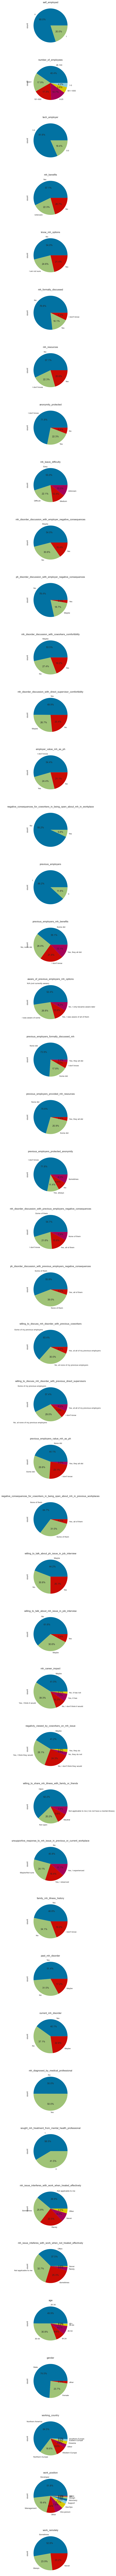

In [196]:
# Visualize data after handling missing values

num_cols = len(df.columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(8, num_cols * 4))

for i, column in enumerate(df.columns):
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout(pad=3.0, w_pad=8.0, h_pad=5.0)
plt.show()


### Encoding

In [197]:
# Label encoding
label = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label.fit_transform(df[column].astype(str))
        
df.head(10)

self_employed  number_of_employees  tech_employer  mh_benefits  \
0              0                    3              1            0   
1              0                    5              1            0   
2              0                    5              1            0   
3              1                    3              1            2   
4              0                    5              0            2   
5              0                    1              1            2   
6              0                    3              1            1   
7              0                    1              1            2   
8              0                    3              0            1   
9              1                    3              1            2   

   know_mh_options  mh_formally_discussed  mh_resources  anonymity_protected  \
0                1                      1             1                    0   
1                2                      2             2                    2   
2                1                      1             1                    0   
3                1                      1             1                    0   
4                2                      1             1                    1   
5                0                      1             2                    2   
6                1                      1             1                    0   
7                2                      1             2                    2   
8                1                      1             1                    0   
9                1                      1             1                    0   

   mh_leave_difficulty  \
0                    1   
1                    1   
2                    2   
3                    1   
4                    2   
5                    1   
6                    1   
7                    1   
8                    0   
9                    1   

   mh_disorder_discussion_with_employer_negative_consequences  ...  \
0                                                  1           ...   
1                                                  1           ...   
2                                                  0           ...   
3                                                  0           ...   
4                                                  2           ...   
5                                                  2           ...   
6                                                  1           ...   
7                                                  1           ...   
8                                                  2           ...   
9                                                  0           ...   

   current_mh_disorder  mh_diagnosed_by_medical_professional  \
0                    1                                     1   
1                    2                                     1   
2                    1                                     0   
3                    2                                     1   
4                    2                                     1   
5                    2                                     0   
6                    1                                     0   
7                    2                                     1   
8                    2                                     1   
9                    2                                     1   

   sought_mh_treatment_from_mental_health_professional  \
0                                                  0     
1                                                  1     
2                                                  1     
3                                                  1     
4                                                  1     
5                                                  1     
6                                                  0     
7                                                  1     
8                                                  1     
9                  

### Dimensionality Reduction

#### Standardization

In [198]:
# Standardize Features
X = df
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std_scaled = pd.DataFrame(X_std, columns=X.columns)


#### Variance-covariance Matrix

In [199]:
# Compute the matrix of variance-covariance
cov_X_std = np.cov(X_std_scaled.T)
print(cov_X_std)


[[ 1.00069832  0.11422308  0.23743064 ...  0.10981086  0.13581617
  -0.13272443]
 [ 0.11422308  1.00069832  0.20670111 ...  0.05316327 -0.0406114
  -0.02438511]
 [ 0.23743064  0.20670111  1.00069832 ...  0.01881203 -0.05012374
  -0.10908946]
 ...
 [ 0.10981086  0.05316327  0.01881203 ...  1.00069832 -0.01675935
   0.01793888]
 [ 0.13581617 -0.0406114  -0.05012374 ... -0.01675935  1.00069832
  -0.0182949 ]
 [-0.13272443 -0.02438511 -0.10908946 ...  0.01793888 -0.0182949
   1.00069832]]


#### Eigenvectors and Eigenvalues

In [200]:
# Compute eigenvectors and eigenvalues on the variance-covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_X_std)
print(eig_vals)


[4.10256366 2.83358305 2.58515393 2.10675786 1.86844549 1.7406048
 1.50126756 0.21218588 0.2428439  1.29357037 1.25635503 1.22057349
 1.13032822 1.12416558 1.07507893 1.0655782  0.36631681 0.38754861
 0.40621251 0.42701742 0.45466681 0.49389136 0.50135582 0.98358359
 0.96666492 0.95340097 0.53558456 0.54886258 0.58167239 0.5976943
 0.60729395 0.61349208 0.64704378 0.90696015 0.90350213 0.68972633
 0.715146   0.86120074 0.84783292 0.73483006 0.74701523 0.76368624
 0.82849665 0.81014814 0.79152156]


In [201]:
print(eig_vecs)


[[-1.05916403e-02  4.68278201e-01  1.78207078e-01 ... -1.39087056e-02
  -3.59505298e-03  1.34397442e-02]
 [-6.10338336e-02  7.20905721e-02  6.24538818e-02 ...  2.02967693e-01
   5.79171894e-02  1.01360315e-01]
 [-7.76803994e-03  1.63020190e-01  1.48629641e-01 ... -2.73379356e-02
  -2.82678853e-01  1.41210353e-02]
 ...
 [-1.01798656e-01  4.23237213e-02 -2.88882162e-02 ...  1.97714403e-01
   8.10719789e-03 -2.80305513e-01]
 [ 4.15880172e-02  5.66208779e-02 -1.17484128e-04 ...  1.18587862e-01
  -3.57498280e-01 -2.13646670e-01]
 [ 6.52671321e-03 -1.00470288e-01 -4.68281550e-02 ... -2.87383914e-01
   3.27582069e-02 -4.54512845e-02]]


#### Select the Principal Components

In [202]:
# Calculate the total sum of Eigenvalues
tot = sum(eig_vals) 
print(tot)


45.03142458100564


In [203]:
# Sort Eigenvalues in decreasing order
exp_var = sorted(eig_vals, reverse=True)

# Present values as percentages
exp_var = exp_var/tot * 100


In [204]:
# print the explained variance
print("Explained variance per PC:", exp_var)


Explained variance per PC: [9.11044608 6.29245705 5.74077758 4.67841708 4.14920359 3.86531142
 3.33382205 2.87259483 2.78995178 2.71049272 2.51008764 2.49640244
 2.38739712 2.36629911 2.18421602 2.14664522 2.11719035 2.01406053
 2.00638141 1.91244391 1.88275838 1.83981888 1.79907288 1.75770934
 1.69589625 1.65887542 1.63181616 1.58810433 1.53165558 1.43687166
 1.36236436 1.34860034 1.32728268 1.29170329 1.21884348 1.18935736
 1.11334657 1.09677045 1.00966562 0.94826541 0.90206453 0.86061814
 0.8134693  0.53927652 0.47119513]


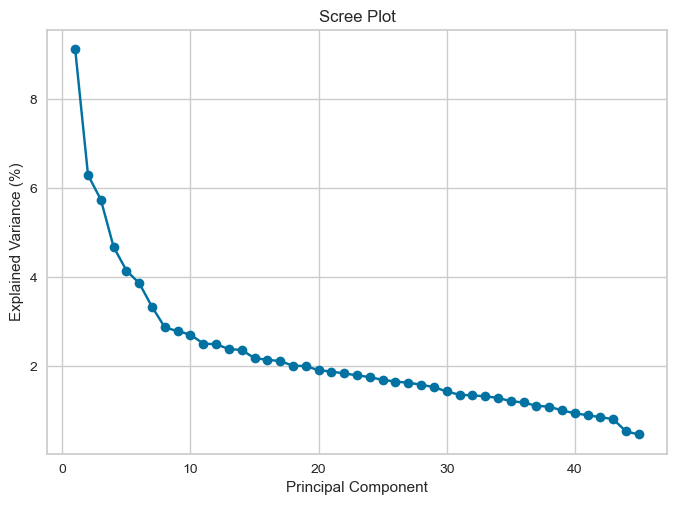

In [205]:
# Plot the explained variance for each principal component
plt.plot(range(1, len(exp_var) + 1), exp_var, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot')
plt.show()


In [206]:
# Compute and print the explained cumulative variance 
cum_exp_var = np.cumsum(exp_var)
print("Cumulative Explained Variance:",cum_exp_var)


Cumulative Explained Variance: [  9.11044608  15.40290313  21.14368071  25.82209779  29.97130138
  33.8366128   37.17043485  40.04302967  42.83298146  45.54347418
  48.05356182  50.54996426  52.93736138  55.30366049  57.48787652
  59.63452173  61.75171208  63.76577261  65.77215402  67.68459793
  69.56735631  71.4071752   73.20624807  74.96395741  76.65985366
  78.31872909  79.95054525  81.53864958  83.07030515  84.50717681
  85.86954118  87.21814152  88.5454242   89.83712749  91.05597097
  92.24532833  93.3586749   94.45544535  95.46511097  96.41337638
  97.31544091  98.17605905  98.98952835  99.52880487 100.        ]


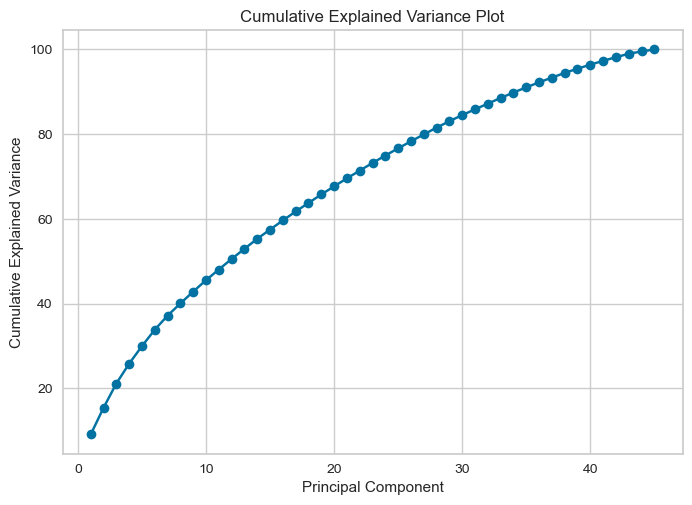

In [207]:
# Plot the cumulative explained variance
plt.plot(range(1, len(cum_exp_var) + 1), cum_exp_var, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.show()


In [208]:
# Perform PCA and retian enough components to explain 80% of the variance
pca = PCA(n_components=0.80).fit(X_std)


In [209]:
# Transform the standardized data and print the shape of the transformed data
X_pca = pca.transform(X_std)
print(X_pca.shape)


(1433, 28)


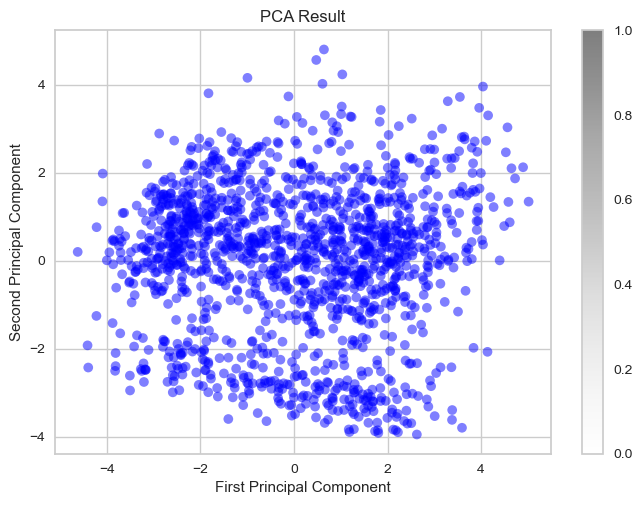

In [210]:
# Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c="blue",edgecolor='none', alpha = 0.5, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Result')
plt.colorbar()
plt.show()


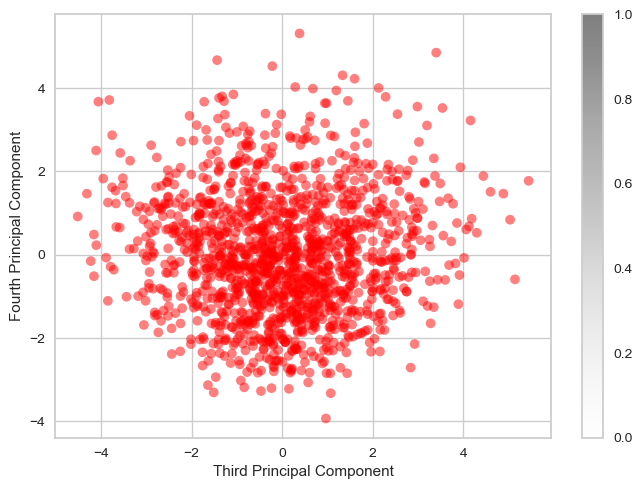

In [211]:
# Create a scatter plot of the third and fourth principal components
plt.scatter(X_pca[:, 2], X_pca[:, 3], c="red", edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Blues', 10))
plt.xlabel('Third Principal Component')
plt.ylabel('Fourth Principal Component')
plt.colorbar()


### ---------------------

# Clustering

### K-Means Model

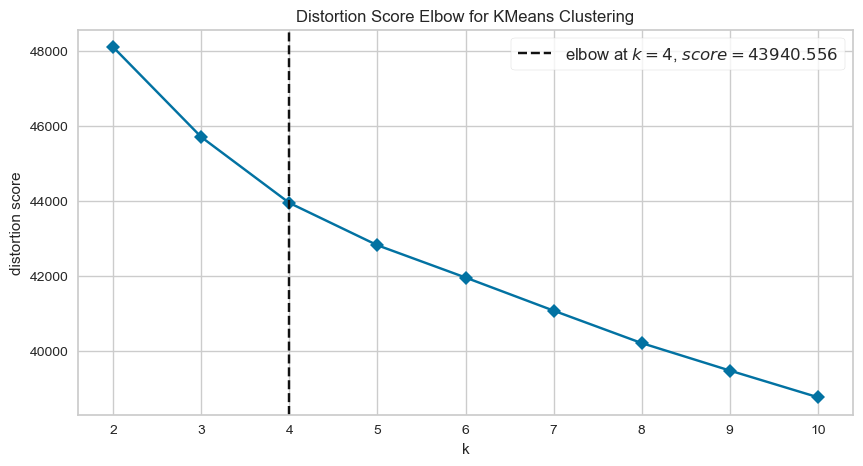

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [212]:
# Initialize KMeans model with k-means++ method for better convergence
model = KMeans(init="k-means++")
visualizer = KElbowVisualizer(model, timings=False)

plt.figure(figsize=(10, 5))

visualizer.fit(X_pca)
visualizer.show()


In [213]:
# Fit KMeans with 4 clusters and predict cluster assignments
kmeans_pca = KMeans(n_clusters=4, init= 'k-means++', random_state=42)

kmeans_predictions = kmeans_pca.fit_predict(X_pca)

kmeans_score = silhouette_score(X_pca, kmeans_predictions)



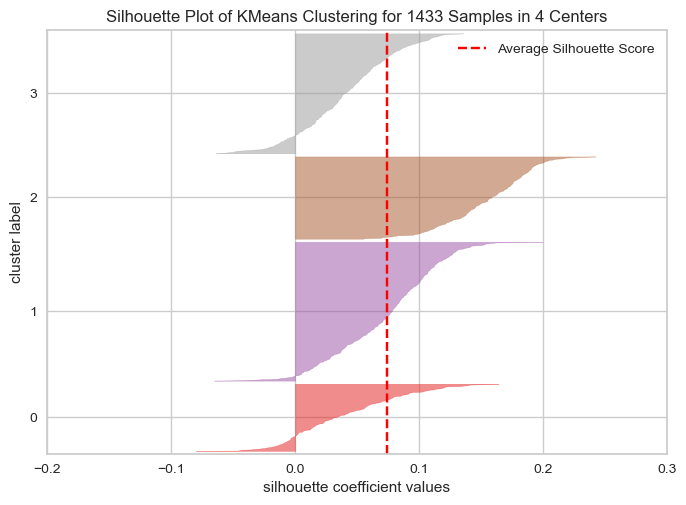

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1433 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [214]:
# Create a SilhouetteVisualizer object for the k-means clustering model
sil_visualizer = SilhouetteVisualizer(kmeans_pca)

# Fit the visualizer to the PCA-transformed data
sil_visualizer.fit(X_pca)    

# Display the silhouette plot
sil_visualizer.show()


### Gaussian Mixture Model

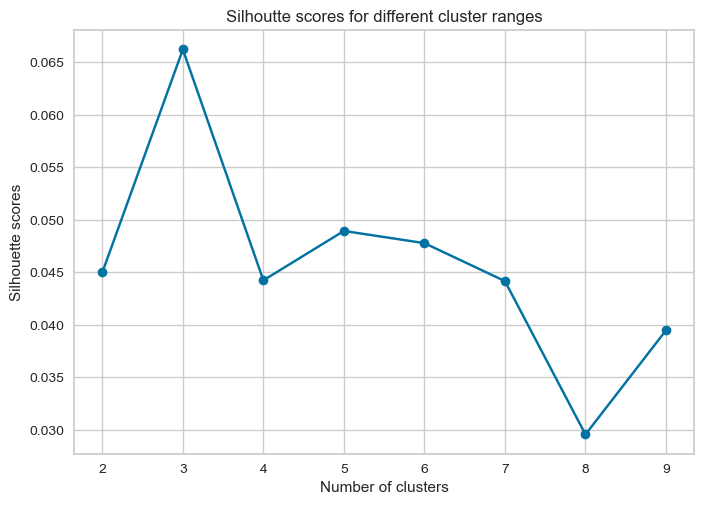

In [215]:
# Decide the number of clusters to use
scores = []
for cluster in range(2,10):
    gmm = mixture.GaussianMixture(n_components=cluster)
    gmm.fit(X_pca)
    predictions = gmm.predict(X_pca)
    scores.append(silhouette_score(X_pca,predictions))
fig , ax = plt.subplots()
ax.plot(range(2,10),scores,linestyle='-',marker='o')
ax.set_title('Silhoutte scores for different cluster ranges')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores')
plt.show()


In [216]:
# Create a Gaussian Mixture Model (GMM) with 3 components (clusters)
gmm = mixture.GaussianMixture(n_components=3)

# Fit the GMM to the PCA-transformed data
cluster_gmm = gmm.fit(X_pca)

# Predict the cluster labels for the PCA-transformed data using the fitted GMM
gmm_predictions = gmm.predict(X_pca)

# Calculate the Silhouette Score to evaluate the quality of the clustering
gmm_score = silhouette_score(X_pca, gmm_predictions)


### Agglomerative Clustering

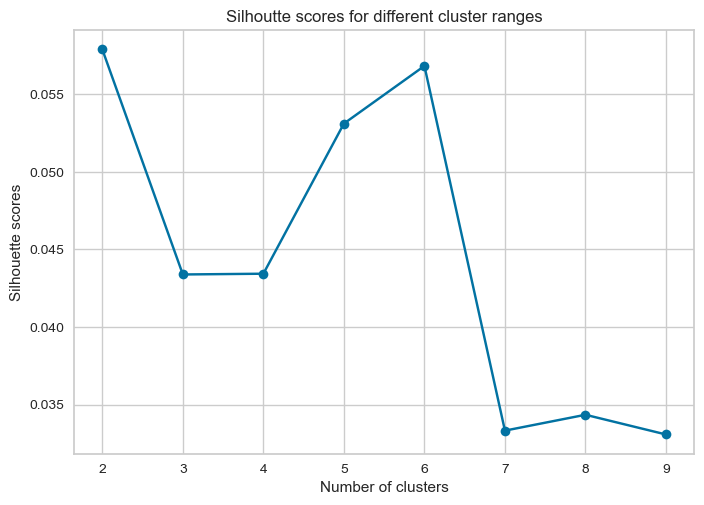

In [217]:
# Decide the number of clusters
scores = []
for cluster in range(2,10):
    agg_cluster = AgglomerativeClustering(n_clusters=cluster)
    agg_cluster.fit(X_pca)
    predictions = agg_cluster.fit_predict(X_pca)
    scores.append(silhouette_score(X_pca,predictions))
fig , ax = plt.subplots()
ax.plot(range(2,10),scores,linestyle='-',marker='o')
ax.set_title('Silhoutte scores for different cluster ranges')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores')
plt.show()


In [218]:
# Create an Agglomerative Clustering model with 2 clusters
agg_cluster = AgglomerativeClustering(n_clusters=2)

# Fit the Agglomerative Clustering model to the PCA-transformed data
cluster_agg = agg_cluster.fit(X_pca)

# Predict the cluster labels for the PCA-transformed data using the fitted model
agg_predictions = agg_cluster.fit_predict(X_pca)

# Calculate the Silhouette Score to evaluate the quality of the clustering
agg_score = silhouette_score(X_pca, agg_predictions)


### Select Best Model

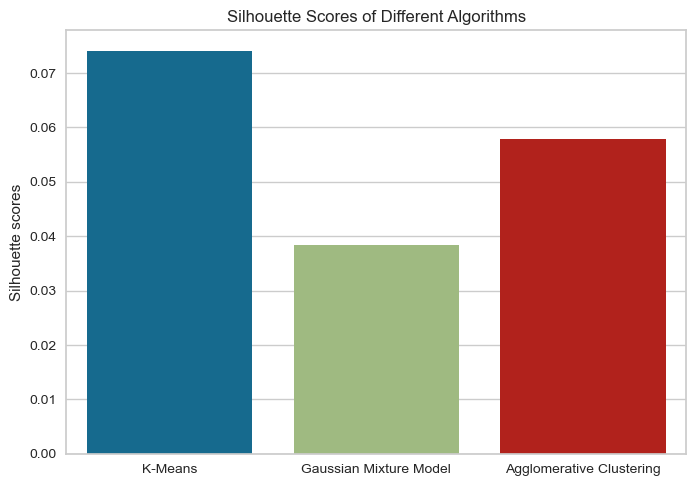

In [219]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar plot with the silhouette scores of different clustering algorithms
sns.barplot(x=['K-Means', 'Gaussian Mixture Model', 'Agglomerative Clustering'], y=[kmeans_score, gmm_score, agg_score], ax=ax)

# Set the title of the plot
ax.set_title('Silhouette Scores of Different Algorithms')

# Set the label for the y-axis
ax.set_ylabel('Silhouette scores')

# Display the plot
plt.show()


### K-Means

In [220]:
# Concatenate the original DataFrame (df) with the PCA-transformed data (X_pca) and 
# Reset the index of the original DataFrame to ensure alignment
df_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(X_pca)], axis=1)


# Add a new column 'kmeans pca' to the DataFrame with the cluster labels from the k-means model
df_pca_kmeans['kmeans pca'] = kmeans_pca.labels_


In [221]:
df_pca_kmeans.head()

self_employed  number_of_employees  tech_employer  mh_benefits  \
0              0                    3              1            0   
1              0                    5              1            0   
2              0                    5              1            0   
3              1                    3              1            2   
4              0                    5              0            2   

   know_mh_options  mh_formally_discussed  mh_resources  anonymity_protected  \
0                1                      1             1                    0   
1                2                      2             2                    2   
2                1                      1             1                    0   
3                1                      1             1                    0   
4                2                      1             1                    1   

   mh_leave_difficulty  \
0                    1   
1                    1   
2                    2   
3                    1   
4                    2   

   mh_disorder_discussion_with_employer_negative_consequences  ...        19  \
0                                                  1           ... -0.298181   
1                                                  1           ... -0.460522   
2                                                  0           ... -1.521476   
3                                                  0           ...  1.097576   
4                                                  2           ... -0.056221   

         20        21        22        23        24        25        26  \
0 -0.478075 -0.384746  0.047017  0.249893  0.191053 -0.809912 -0.696791   
1  0.151531 -1.001134 -0.631592  0.698757  0.054669  0.022067  0.074432   
2 -0.807438 -1.782673 -0.869322 -0.223451 -0.447949 -1.901868  0.032989   
3  0.059072  1.507548  0.866330  0.671023  0.079324 -1.436619 -0.325283   
4  0.900473 -0.228022  1.606465 -0.699875  0.126751 -0.968553 -0.383608   

         27  kmeans pca  
0 -0.111479           1  
1  0.772530           0  
2  0.612989           1  
3 -0.319998           2  
4  1.266243           3  

[5 rows x 74 columns]

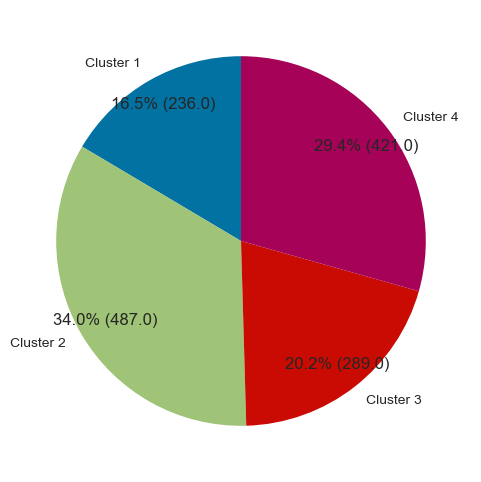

In [222]:
# Visualize clusters with a pie chart

# Calculate the sizes of each cluster
sizes = df_pca_kmeans['kmeans pca'].value_counts().sort_index().tolist()

cluster_labels = [f'Cluster {i + 1}' for i in range(4)]

def func(val):
    a = np.round(val/100.*sum(sizes))
    return f'{round(val, 1)}% ({a})'

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=cluster_labels, autopct=func, startangle=90, pctdistance=0.85)
plt.show()


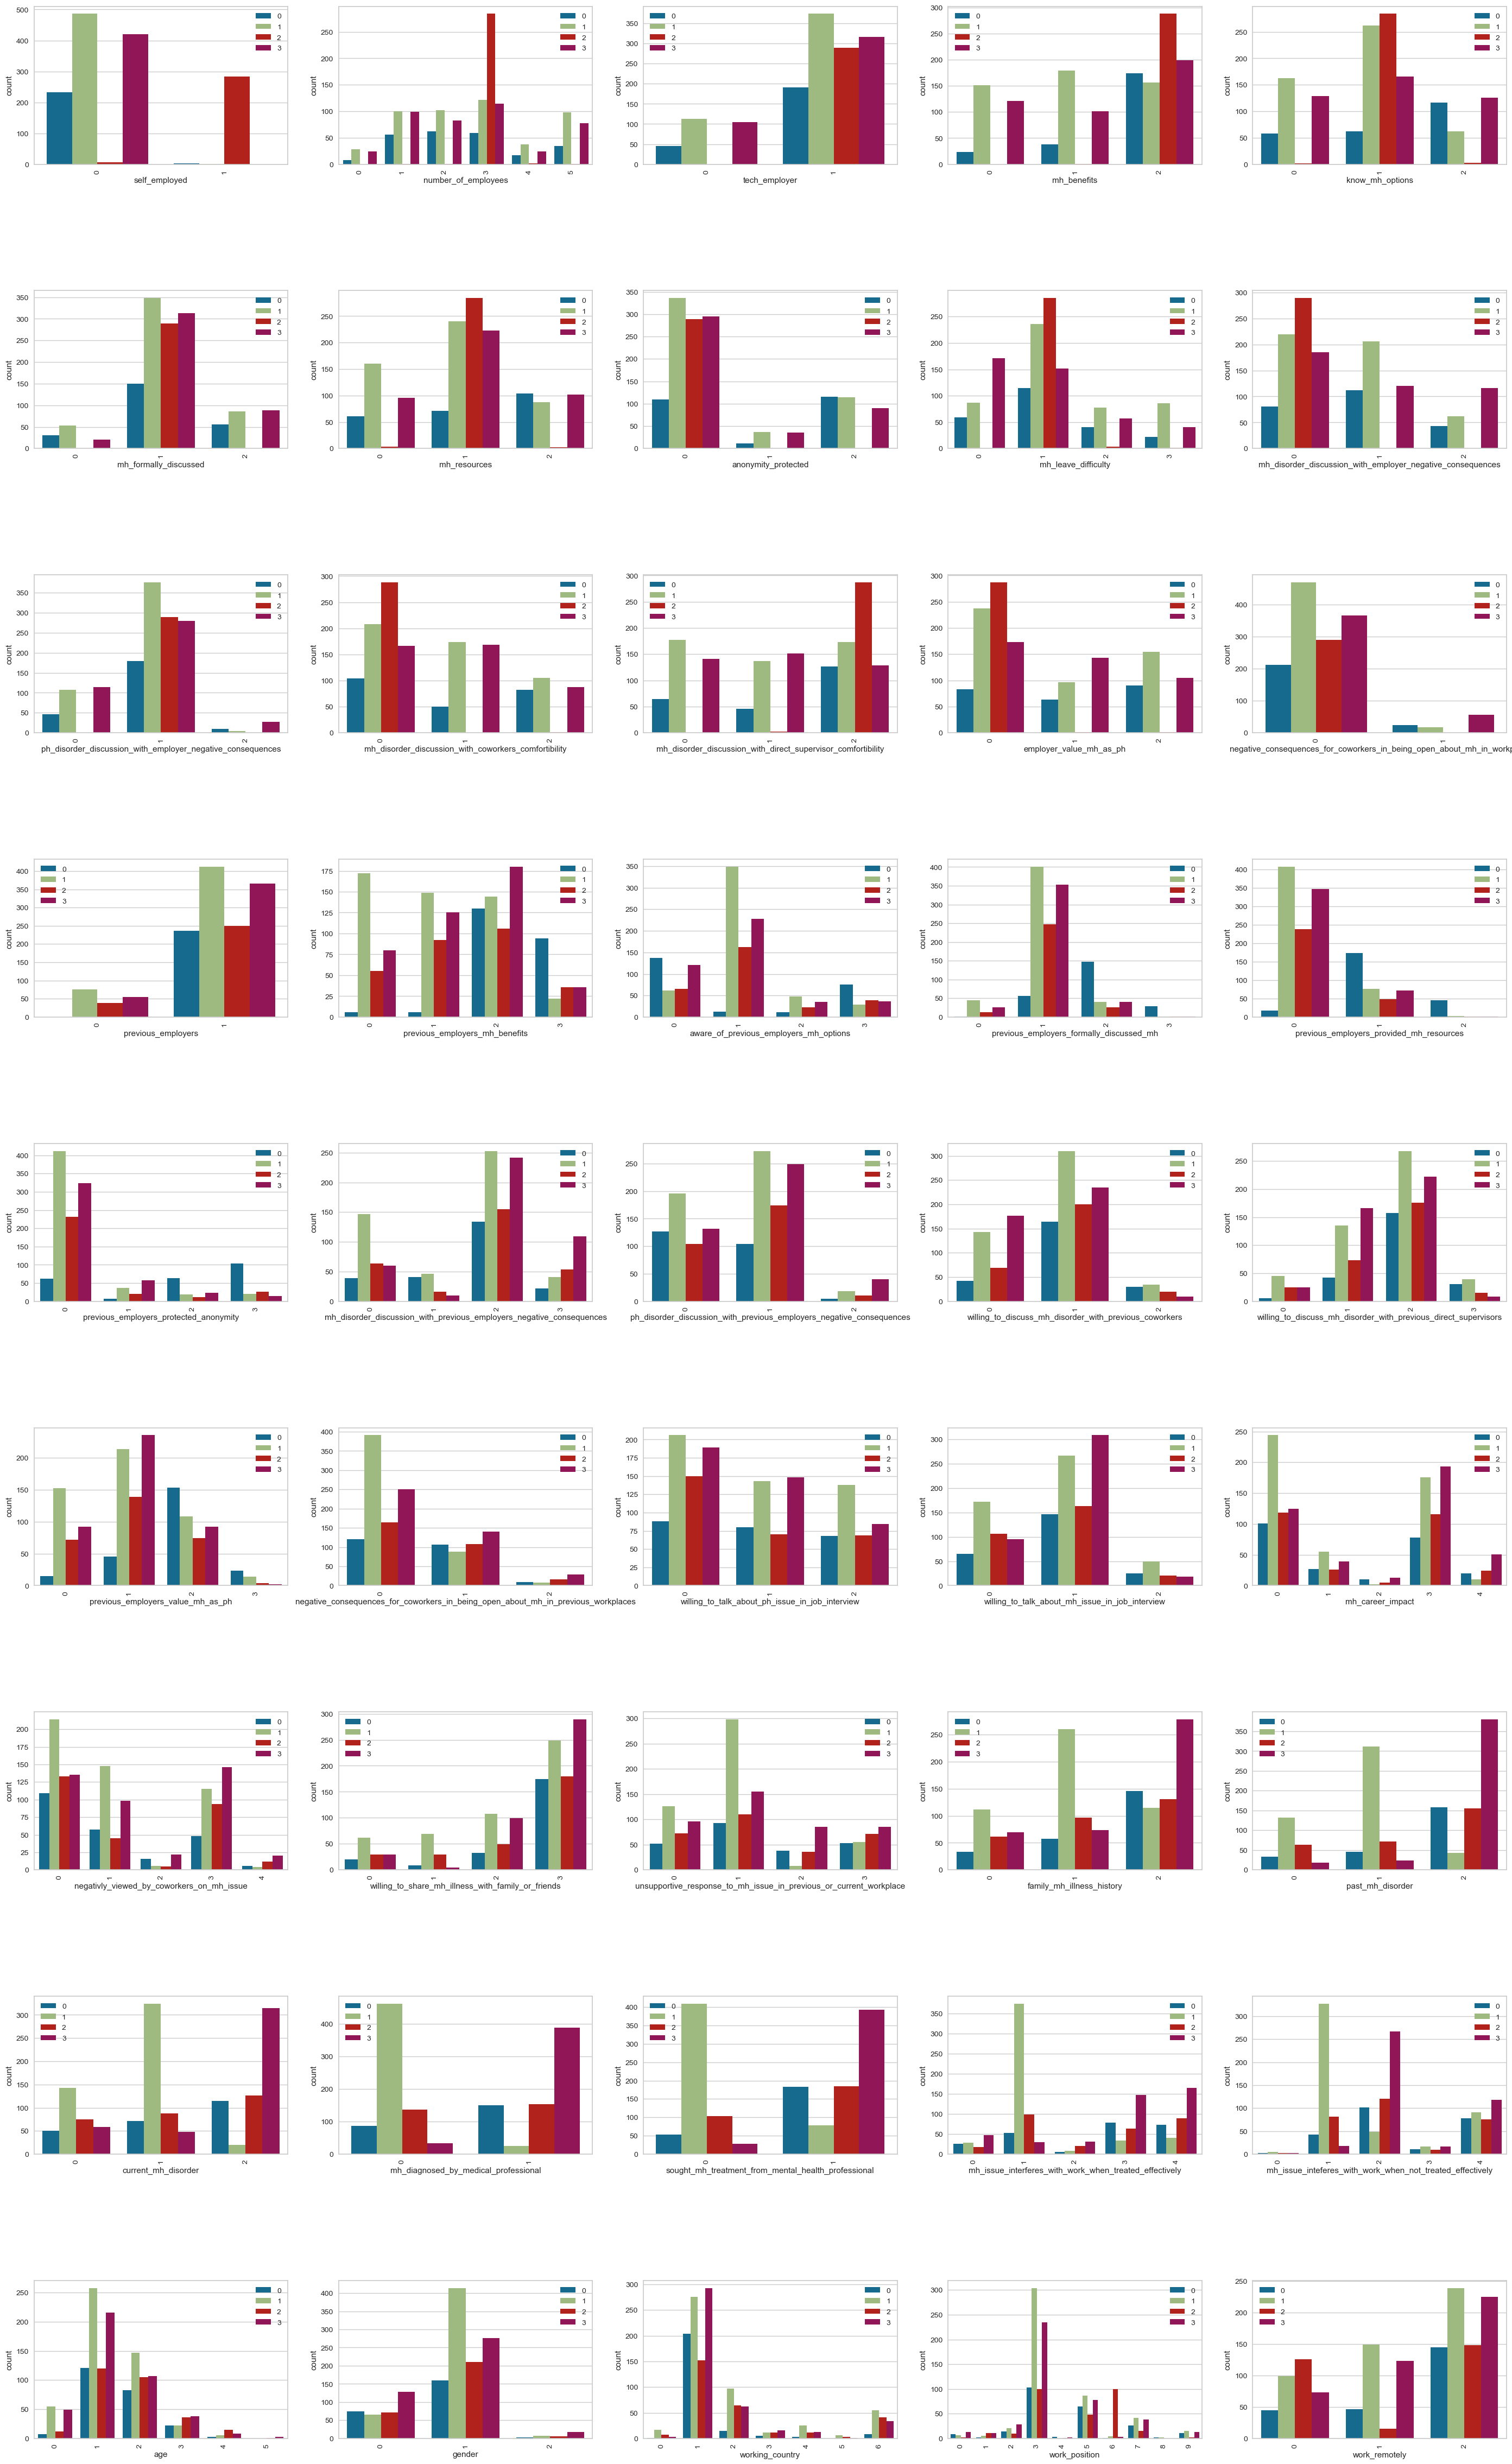

In [223]:
# Visualize clusters distributions across features with multi-plot countplot 

c =  X.columns

plt.figure(figsize=(35, 65))
for i, column in enumerate(df.columns):
    if column != kmeans_predictions:
        plt.subplot(10, 5, i+1)
        sns.countplot(data=df, x=column, hue=kmeans_predictions)
        plt.xticks(rotation=90)
        plt.subplots_adjust(wspace=0.2, hspace=0.8)

In [227]:
# Calculate and display the counts of each feature value for each cluster

# List of clusters
clusters = sorted(df_pca_kmeans['kmeans pca'].unique())

# List of features
features = df.columns

# Initialize a dictionary to store the counts
cluster_feature_counts = {cluster: {} for cluster in clusters}

# Count the occurrences of each value for each feature within each cluster
for cluster in clusters:
    cluster_data = df_pca_kmeans[df_pca_kmeans['kmeans pca'] == cluster]
    for feature in features:
        value_counts = cluster_data[feature].value_counts().to_dict()
        cluster_feature_counts[cluster][feature] = value_counts

# Display the counts
for cluster, features_counts in cluster_feature_counts.items():
    print(f"Cluster {cluster + 1}:")
    for feature, counts in features_counts.items():
        print(f"  Feature '{feature}': {counts}")
    print()


Cluster 1:
  Feature 'self_employed': {0: 233, 1: 3}
  Feature 'number_of_employees': {2: 62, 3: 59, 1: 56, 5: 34, 4: 17, 0: 8}
  Feature 'tech_employer': {1: 191, 0: 45}
  Feature 'mh_benefits': {2: 174, 1: 38, 0: 24}
  Feature 'know_mh_options': {2: 116, 1: 62, 0: 58}
  Feature 'mh_formally_discussed': {1: 150, 2: 56, 0: 30}
  Feature 'mh_resources': {2: 104, 1: 71, 0: 61}
  Feature 'anonymity_protected': {2: 116, 0: 109, 1: 11}
  Feature 'mh_leave_difficulty': {1: 115, 0: 59, 2: 40, 3: 22}
  Feature 'mh_disorder_discussion_with_employer_negative_consequences': {1: 112, 0: 81, 2: 43}
  Feature 'ph_disorder_discussion_with_employer_negative_consequences': {1: 179, 0: 47, 2: 10}
  Feature 'mh_disorder_discussion_with_coworkers_comfortibility': {0: 104, 2: 82, 1: 50}
  Feature 'mh_disorder_discussion_with_direct_supervisor_comfortibility': {2: 126, 0: 64, 1: 46}
  Feature 'employer_value_mh_as_ph': {2: 90, 0: 83, 1: 63}
  Feature 'negative_consequences_for_coworkers_in_being_open_about_

In [230]:
# Calculate and display the percentages of each feature value for each cluster

# List of clusters
clusters = sorted(df_pca_kmeans['kmeans pca'].unique())

# List of features
features = df.columns

# Initialize a dictionary to store the percentages
cluster_feature_percentages = {cluster: {} for cluster in clusters}

# Calculate the percentages of each value for each feature within each cluster
for cluster in clusters:
    cluster_data = df_pca_kmeans[df_pca_kmeans['kmeans pca'] == cluster]
    total_count = len(cluster_data)
    for feature in features:
        value_counts = cluster_data[feature].value_counts(normalize=True).to_dict()
        value_percentages = {k: f"{round(v * 100, 2)}%" for k, v in value_counts.items()}
        cluster_feature_percentages[cluster][feature] = value_percentages

# Display the percentages
for cluster, features_percentages in cluster_feature_percentages.items():
    print(f"Cluster {cluster + 1}:")
    for feature, percentages in features_percentages.items():
        print(f"  Feature '{feature}': {percentages}")
    print()



Cluster 1:
  Feature 'self_employed': {0: '98.73%', 1: '1.27%'}
  Feature 'number_of_employees': {2: '26.27%', 3: '25.0%', 1: '23.73%', 5: '14.41%', 4: '7.2%', 0: '3.39%'}
  Feature 'tech_employer': {1: '80.93%', 0: '19.07%'}
  Feature 'mh_benefits': {2: '73.73%', 1: '16.1%', 0: '10.17%'}
  Feature 'know_mh_options': {2: '49.15%', 1: '26.27%', 0: '24.58%'}
  Feature 'mh_formally_discussed': {1: '63.56%', 2: '23.73%', 0: '12.71%'}
  Feature 'mh_resources': {2: '44.07%', 1: '30.08%', 0: '25.85%'}
  Feature 'anonymity_protected': {2: '49.15%', 0: '46.19%', 1: '4.66%'}
  Feature 'mh_leave_difficulty': {1: '48.73%', 0: '25.0%', 2: '16.95%', 3: '9.32%'}
  Feature 'mh_disorder_discussion_with_employer_negative_consequences': {1: '47.46%', 0: '34.32%', 2: '18.22%'}
  Feature 'ph_disorder_discussion_with_employer_negative_consequences': {1: '75.85%', 0: '19.92%', 2: '4.24%'}
  Feature 'mh_disorder_discussion_with_coworkers_comfortibility': {0: '44.07%', 2: '34.75%', 1: '21.19%'}
  Feature 'mh_d